# **Setup**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

## Data from = https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
data = pd.read_csv("drive/MyDrive/ml/smoking_driking_dataset_Ver01.csv")

# **Exploratory Data analysis**

In [4]:
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
data.columns

Index(['sex', 'age', 'height', 'weight', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

In [ ]:
data.shape

(991346, 24)

In [ ]:
data.loc[data.isna().any(axis=1), :]

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN


Tidak ada missing values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

## **Smoking and Drinking**

Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)

In [ ]:
#Target variables
print(data['DRK_YN'].value_counts())
print(data['SMK_stat_type_cd'].value_counts())

N    495858
Y    495488
Name: DRK_YN, dtype: int64
1.0    602441
3.0    213954
2.0    174951
Name: SMK_stat_type_cd, dtype: int64


<Axes: xlabel='SMK_stat_type_cd', ylabel='count'>

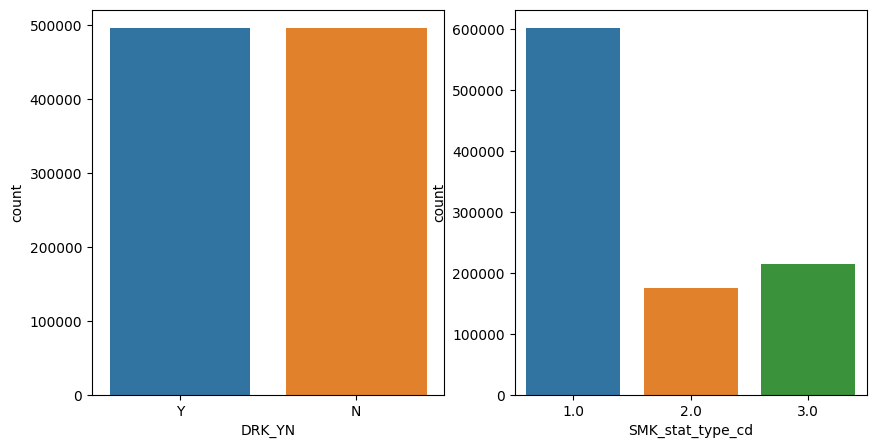

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=data, x="DRK_YN", ax=axs[0])
sns.countplot(data=data, x="SMK_stat_type_cd", ax=axs[1])

<Axes: xlabel='DRK_YN', ylabel='count'>

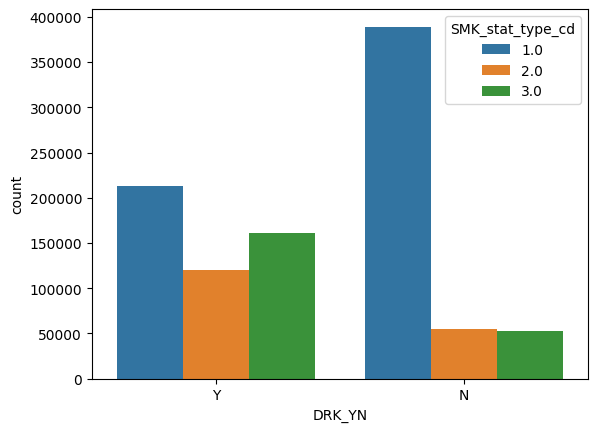

In [ ]:
sns.countplot(data=data, x="DRK_YN", hue="SMK_stat_type_cd")

In [ ]:
table = pd.crosstab(data["DRK_YN"], data["SMK_stat_type_cd"])
stat, p, dof, exp_table = stats.chi2_contingency(table)

print(stat, p)
print(stats.contingency.association(table))

131811.45997854197 0.0
0.36463970452226574


Terdapat hubungan yang relatif lemah antar 2 variabel dependen yaitu DRK_YN dan SMK_stat_type_cd

In [5]:
drink_sig = []
smk_sig = []
drink_weak = []
smk_weak = []
#membuat list kolom yang berpengaruh kuat/lemah dengan DRK dan SMK


# function effect size
def pooled_sd(s1, s2, n1, n2):
  num = ((n1-1)*(s1**2) + (n2-1)*(s2**2))
  return (num/(n1+n2-2))**(1/2)

def cohen(a, b):
  return abs(a.mean() - b.mean()) / pooled_sd(a.std(), b.std(), a.count(), b.count())

def eta2(*args):
  data = pd.concat(args)
  group_mean = np.array([arg.mean() for arg in args])
  group_size = np.array([arg.size for arg in args])
  total_mean = ((group_size)*(group_mean)).sum()/group_size.sum()
  group_var = (group_size*(((group_mean)-(total_mean))**2)).sum()/group_size.sum()
  total_var = ((data-total_mean)**2).sum() / group_size.sum()
  return group_var/total_var



## **Sex**

In [ ]:
data['sex'].value_counts()

Male      526415
Female    464931
Name: sex, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

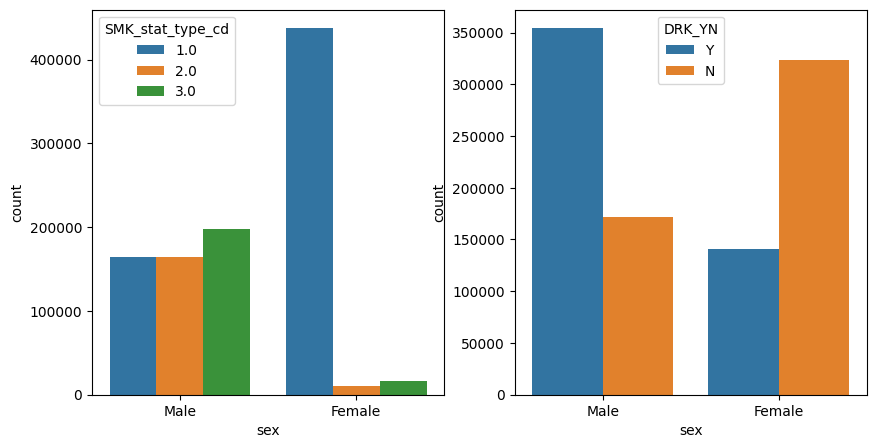

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=data, x="sex", hue="SMK_stat_type_cd", ax=axs[0])
sns.countplot(data=data, x="sex", hue="DRK_YN", ax=axs[1])

In [ ]:
table = pd.crosstab(data["sex"], data["DRK_YN"])
res = [*stats.chi2_contingency(table)]
print(res[0], res[1])
print(stats.contingency.association(table))

134780.52648425306 0.0
0.3687256295192648


In [ ]:
table = pd.crosstab(data["sex"], data["SMK_stat_type_cd"])
res = [*stats.chi2_contingency(table)]
print(res[0], res[1])
print(stats.contingency.association(table))

409429.412713673 0.0
0.6426535189318782


In [6]:
drink_weak.append("sex")
smk_sig.append("sex")

Sex akan digunakan dalam model karena berpengaruh memiliki hubungan signifikan dengan variabel dependen

## **Age, height, dan weight**

Age, height dan weight dibulatkan ke 5 tahun

<Axes: xlabel='age', ylabel='count'>

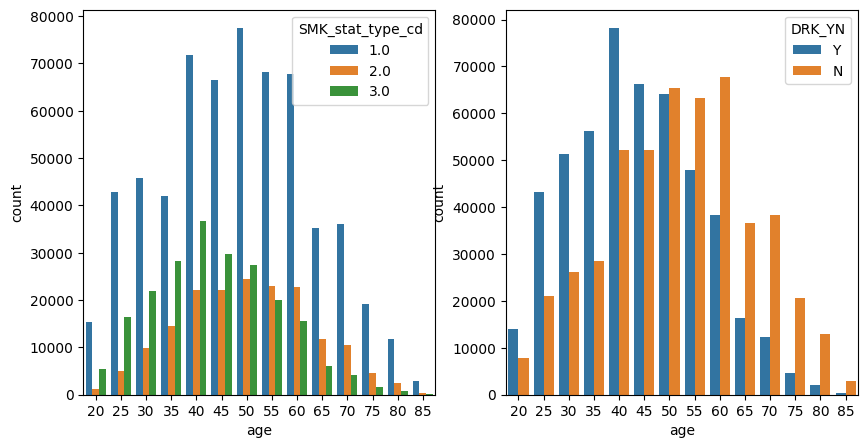

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=data, x="age", hue="SMK_stat_type_cd", ax=axs[0])
sns.countplot(data=data, x="age", hue="DRK_YN", ax=axs[1])

Stat test

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "age"], data.loc[data["DRK_YN"]=="N", "age"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "age"], data.loc[data["DRK_YN"]=="N", "age"]))

TtestResult(statistic=-295.5746727444517, pvalue=0.0, df=991344.0)
0.5937240127730551


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "age"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "age"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=14535.221311990063, pvalue=0.0)
0.02848888637651215


Age akan dimasukkan sebagai significant feature untuk drink karena memiliki perbedaan yang signifikan untuk drink  dan juga memiliki effect size yang cukup besar

In [7]:
drink_sig.append("age")

<Axes: xlabel='height', ylabel='count'>

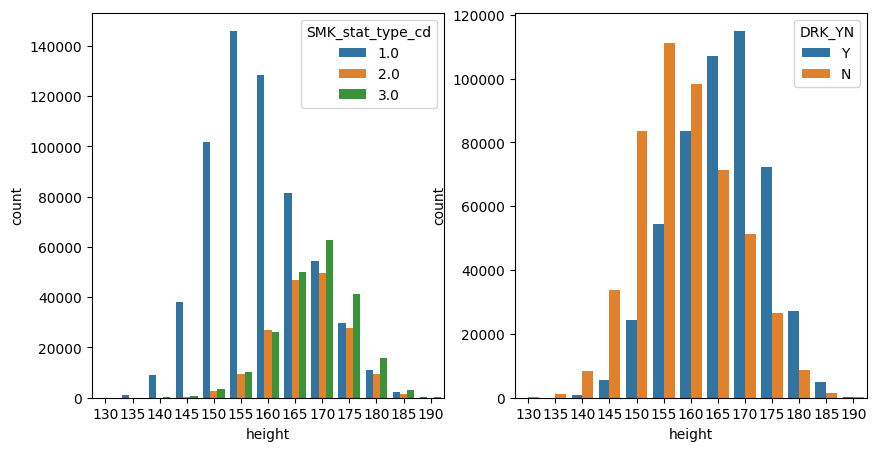

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=data, x="height", hue="SMK_stat_type_cd", ax=axs[0])
sns.countplot(data=data, x="height", hue="DRK_YN", ax=axs[1])

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "height"], data.loc[data["DRK_YN"]=="N", "height"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "height"], data.loc[data["DRK_YN"]=="N", "height"]))

TtestResult(statistic=402.2226072371411, pvalue=0.0, df=991344.0)
0.807948861719102


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "height"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "height"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=159068.41908930265, pvalue=0.0)
0.24294901601624588


In [8]:
drink_sig.append("height")
smk_weak.append("height")

Height akan dimasukkan sebagai fitur yang signifikan untuk memprediksi drink karena memiliki effect size yang tinggi dan fitur yang lemah untuk memprediksi smoking karena effect size yang relatif rendah

<Axes: xlabel='weight', ylabel='count'>

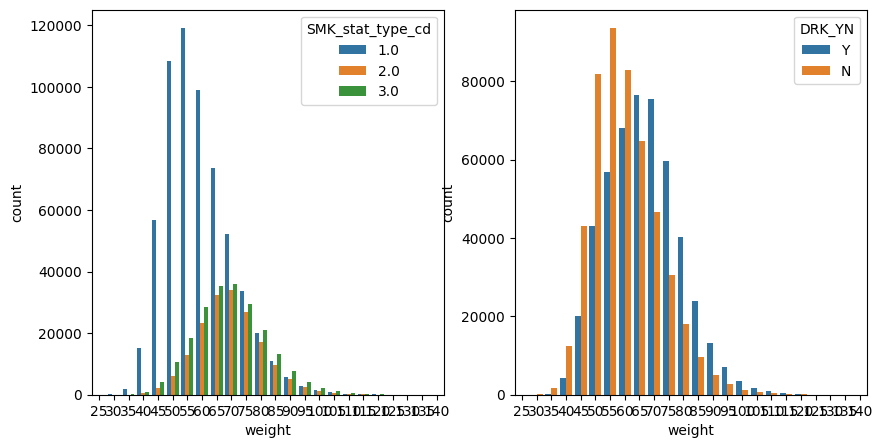

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(data=data, x="weight", hue="SMK_stat_type_cd", ax=axs[0])
sns.countplot(data=data, x="weight", hue="DRK_YN", ax=axs[1])

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "weight"], data.loc[data["DRK_YN"]=="N", "weight"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "weight"], data.loc[data["DRK_YN"]=="N", "weight"]))

TtestResult(statistic=272.8362413145153, pvalue=0.0, df=991344.0)
0.5480490818752412


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "weight"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "weight"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=91974.61644777104, pvalue=0.0)
0.1565136123144029


In [9]:
drink_sig.append("weight")
smk_weak.append("weight")

Weight akan dimasukkan sebagai fitur yang signifikan untuk memprediksi drink karena effect size terhadap drink yang tinggi dan fitur yang lemah untuk memprediksi smoking karena effect size yang relatif rendah

## **Waistline**

<Axes: xlabel='waistline'>

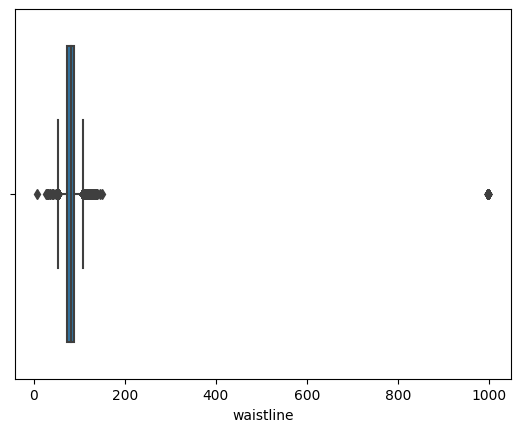

In [ ]:
sns.boxplot(data=data, x="waistline")

***Waistline 999 cm kemungkinan besar outlier karena measurement error***


In [ ]:
data.loc[data["waistline"]>200, :].shape

(57, 24)

***Karena jumlah data waistline 999 sedikit, maka akan di drop***

<Axes: xlabel='waistline'>

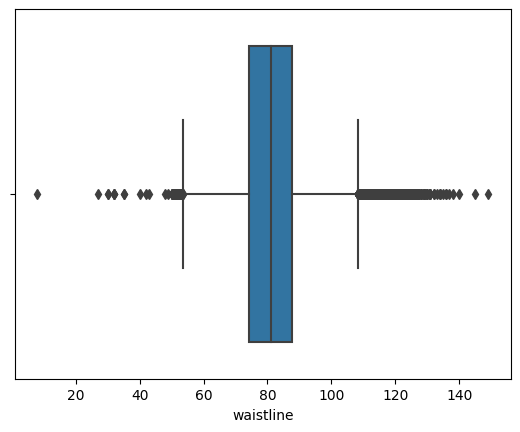

In [ ]:
data = data.loc[data["waistline"]<200, :]
sns.boxplot(data=data, x="waistline")

<Axes: xlabel='waistline', ylabel='Count'>

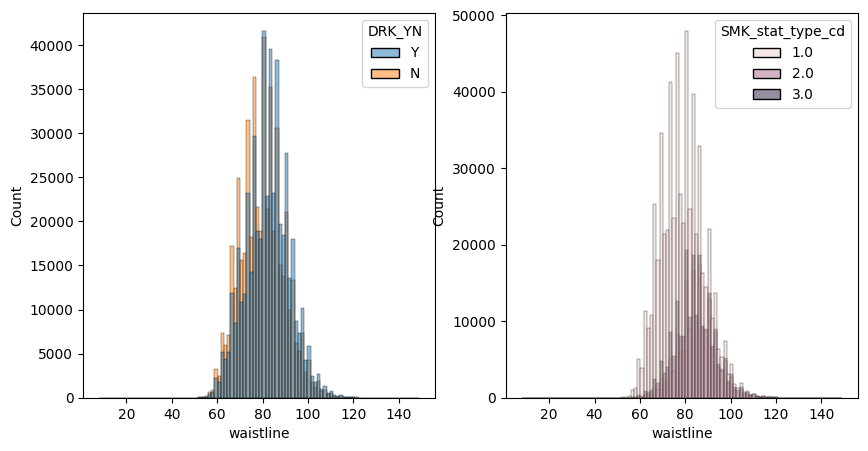

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.histplot(data=data, x="waistline", hue="DRK_YN", bins=100, ax=axs[0])
sns.histplot(data=data, x="waistline", hue="SMK_stat_type_cd", bins=100, ax=axs[1])

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"] == "Y","waistline"], data.loc[data["DRK_YN"] == "N","waistline"]))
print(cohen(data.loc[data["DRK_YN"] == "Y","waistline"], data.loc[data["DRK_YN"] == "N","waistline"]))

TtestResult(statistic=120.55280979984103, pvalue=0.0, df=991287.0)
0.24216267833643668


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i,"waistline"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i,"waistline"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=47586.461280067655, pvalue=0.0)
0.08759919089795828


In [10]:
drink_weak.append("waistline")

Waistline akan digunakan dalam model untuk prediksi drink  sebagai fitur yang lemah karena memiliki effect size yang relatif rendah dan memiliki effect size yang rendah terhadap smoke


## **Sight**

<Axes: xlabel='sight_right', ylabel='count'>

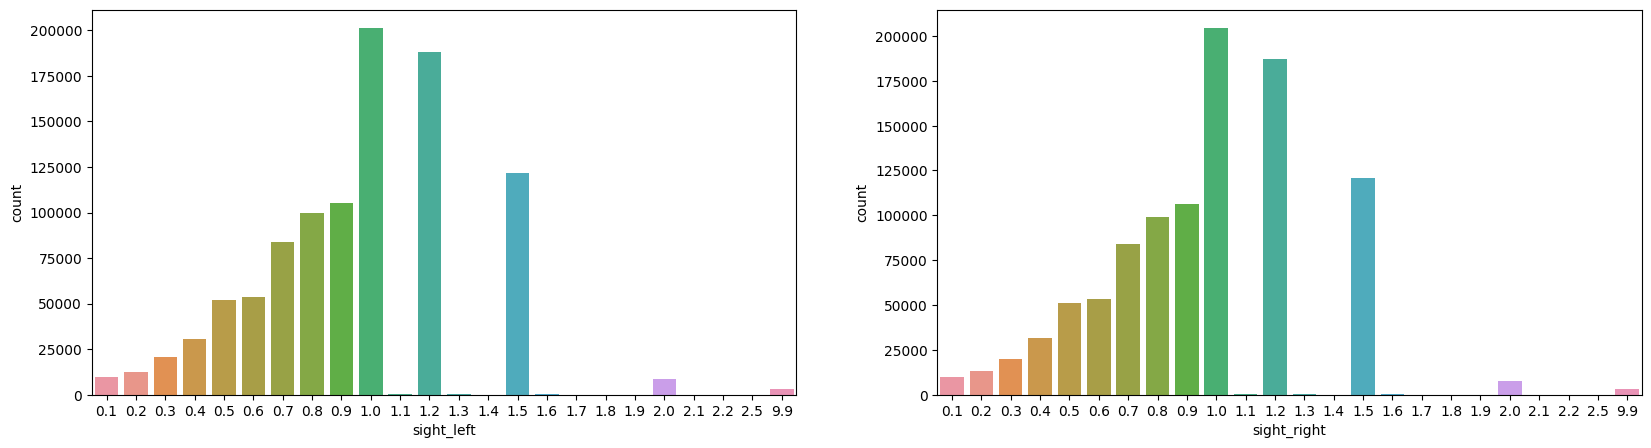

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(data=data, x="sight_left", ax=axs[0])
sns.countplot(data=data, x="sight_right", ax=axs[1])

***Eyesight 9.9 kemungkinan besar adalah outlier karena error***<br>
visual aquity manusia biasanya (0.0, 2.0]<br>
burung elang memiliki visual aquity 10.0<br>
maka kemungkinan besar visual aquity 9.9 kemungkinan merupakan data yang salah<br>

In [ ]:
print(data.loc[data["sight_left"]==9.9, :].shape)
print(data.loc[data["sight_right"] == 9.9].shape)
print(data.loc[(data["sight_left"]==9.9) & (data["sight_right"]==9.9), :].shape)

(3118, 24)
(3111, 24)
(484, 24)


***Karena eyesight 9.9 tidak terlalu banyak, maka akan di drop***

In [11]:
data = data.loc[(data["sight_left"]!=9.9) & (data["sight_right"]!=9.9), :]

<Axes: xlabel='sight_right', ylabel='count'>

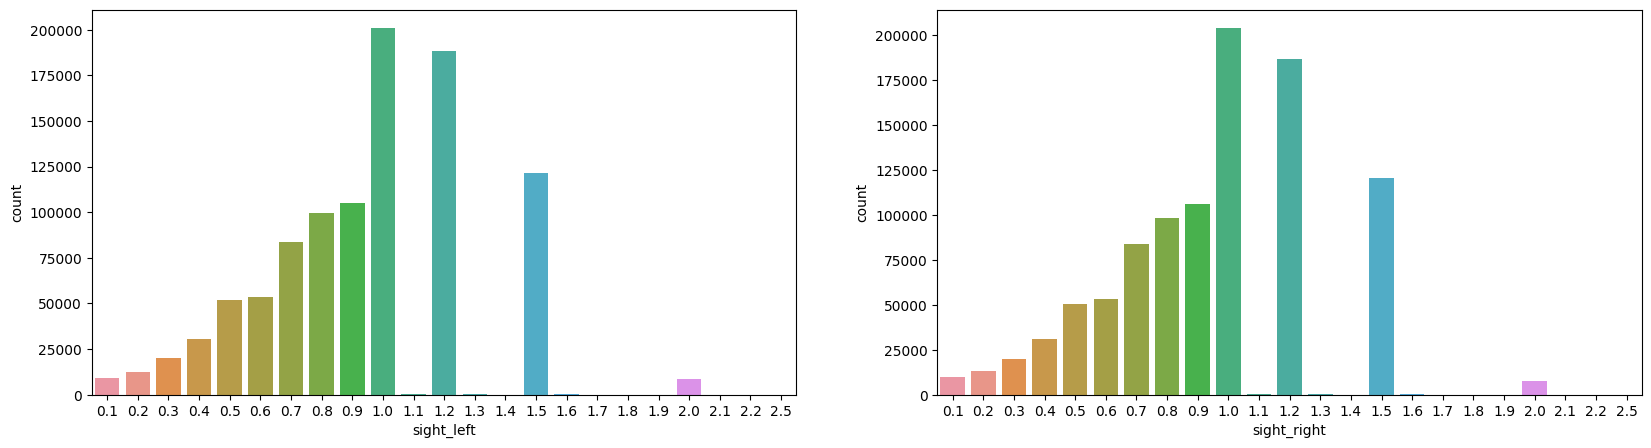

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20,5))
sns.countplot(data=data, x="sight_left", ax=axs[0])
sns.countplot(data=data, x="sight_right", ax=axs[1])

In [ ]:
print(stats.ttest_rel(data["sight_left"], data["sight_right"]))
print(cohen(data["sight_left"], data["sight_right"]))

TtestResult(statistic=9.31759310389261, pvalue=1.1924225965503135e-20, df=985543)
0.006999508016458098


Perbedaan antara sight left dan right signifikan, namun dengan effect size yang tidak besar, maka sight right dan left akan digabung dengan menggunakan mean

In [12]:
data["sight"] = (data["sight_left"] + data["sight_right"])/2
data = data.drop(["sight_left", "sight_right"], axis=1)

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "sight"], data.loc[data["DRK_YN"]=="N", "sight"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "sight"], data.loc[data["DRK_YN"]=="N", "sight"]))

TtestResult(statistic=175.86870011184956, pvalue=0.0, df=985542.0)
0.35430802234744196


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "sight"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "sight"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=8574.2633996224, pvalue=0.0)
0.017102529088925206


In [13]:
drink_weak.append("sight")

sight akan digunakan sebagai fitur weak untuk drink karena effect size yang relatif rendah, dan memiliki effect size yang mendekati 0 untuk smoke

## **Hearing**

hearing 1 artinya normal<br>
hearing 2 artinya abnormal

<Axes: xlabel='hear_right', ylabel='count'>

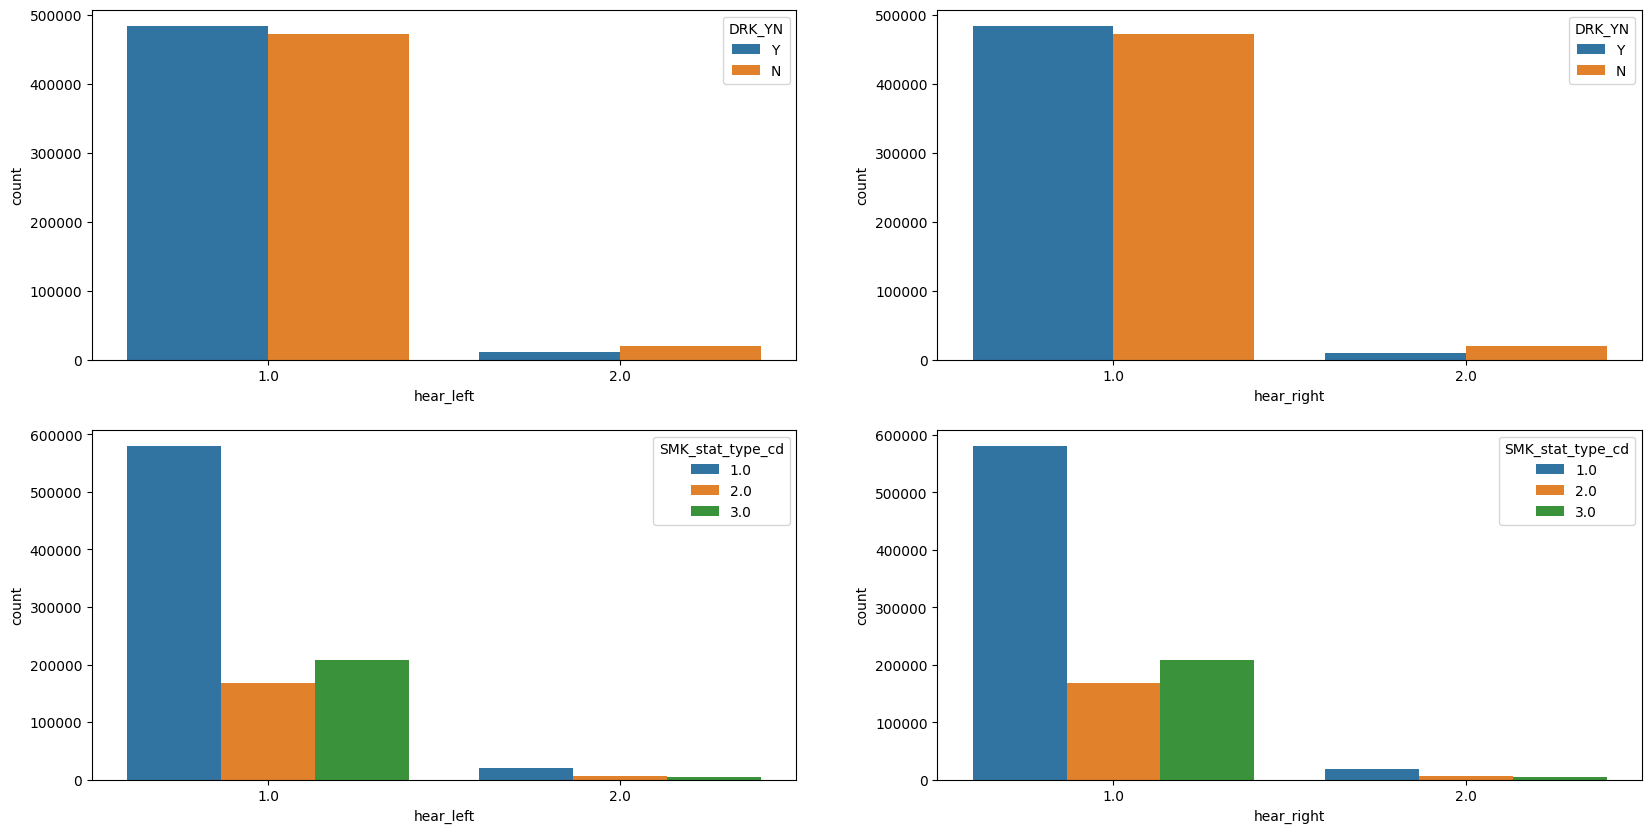

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20,10))
sns.countplot(data=data, x="hear_left", ax=axs[0][0], hue="DRK_YN")
sns.countplot(data=data, x="hear_right", ax=axs[0][1], hue="DRK_YN")
sns.countplot(data=data, x="hear_left", ax=axs[1][0], hue="SMK_stat_type_cd")
sns.countplot(data=data, x="hear_right", ax=axs[1][1], hue="SMK_stat_type_cd")

In [ ]:
print(data.loc[data["hear_left"]==2, "hear_left"].count()/data.shape[0])
print(data.loc[data["hear_right"]==2, "hear_right"].count()/data.shape[0])

0.031070150089696654
0.030075775409317086


Variasi pada hear_left dan hear_right mirip, sehingga kita akan menyatukan hear_left dan hear_right menjadi hear dengan mengambil mean

In [14]:
data["hear"] = (data["hear_right"]+data["hear_left"])/2

In [15]:
data = data.drop(["hear_left", "hear_right"], axis=1)

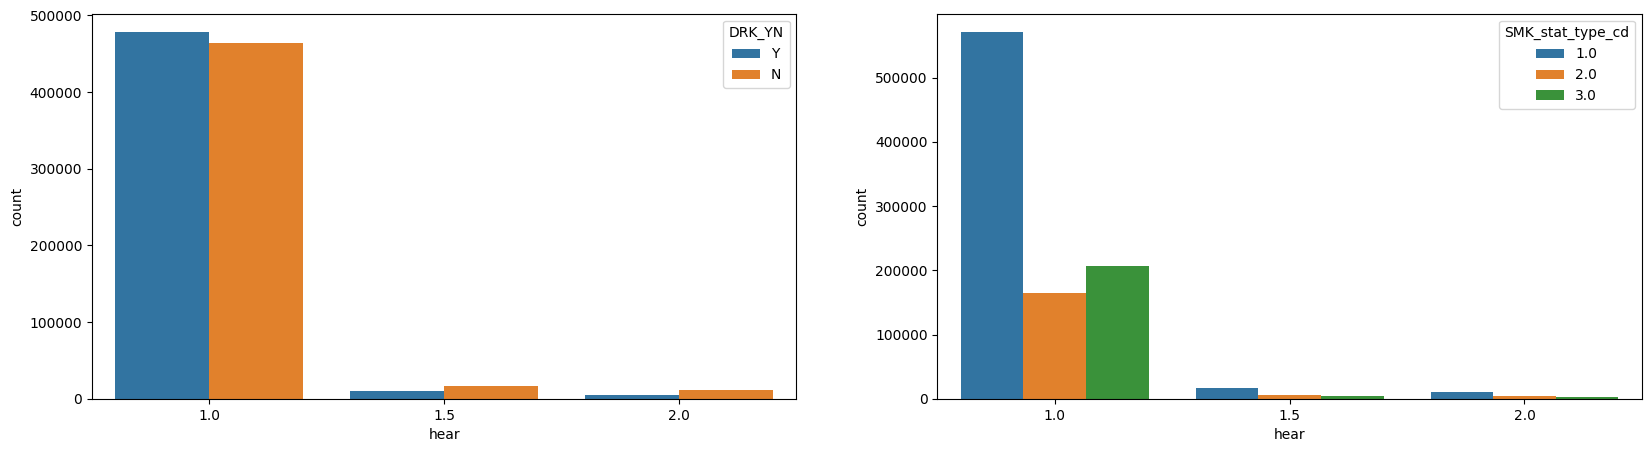

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
hear_drink = sns.countplot(data=data, x="hear", hue="DRK_YN", ax=axs[0])
hear_smoke = sns.countplot(data=data, x="hear", hue="SMK_stat_type_cd", ax=axs[1])

In [ ]:
table = pd.crosstab(data["hear"], data["DRK_YN"])
res = stats.chi2_contingency(table)

print(res[0], res[1])
print(stats.contingency.association(table))
print(table)

4387.433890034025 0.0
0.06672172772876382
DRK_YN       N       Y
hear                  
1.0     463572  478266
1.5      17136   10014
2.0      11358    5198


In [ ]:
table = pd.crosstab(data["hear"], data["SMK_stat_type_cd"])
res = stats.chi2_contingency(table)
print(res[0], res[1])
print(stats.contingency.association(table))
print(table)

1283.010863458134 1.6054903245295999e-276
0.025513037056258663
SMK_stat_type_cd     1.0     2.0     3.0
hear                                    
1.0               571049  164544  206245
1.5                17173    5648    4329
2.0                10647    3601    2308


hear memiliki pengaruh yang sangat kecil untuk drink dan smoke karena memiliki effect size yang sangat kecil

## **SBP, DBP, PP**

SBP = Systolic Blood Pressure<br>
DBP = Diastolic Blood Pressure<br>

SBP = tekanan darah saat jantung berkontraksi<br>
DBP = tekanan darah saat jantung relaksasi

rata rata yang normal = 90/60 - 120/80

In [ ]:
data[["SBP", "DBP"]].describe()

,SBP,DBP
count,985544.000000,985544.000000
mean,122.402657,76.047802
std,14.529492,9.887729
min,70.000000,33.000000
25%,112.000000,70.000000
50%,120.000000,76.000000
75%,131.000000,82.000000
max,273.000000,185.000000


<Axes: xlabel='DBP', ylabel='Count'>

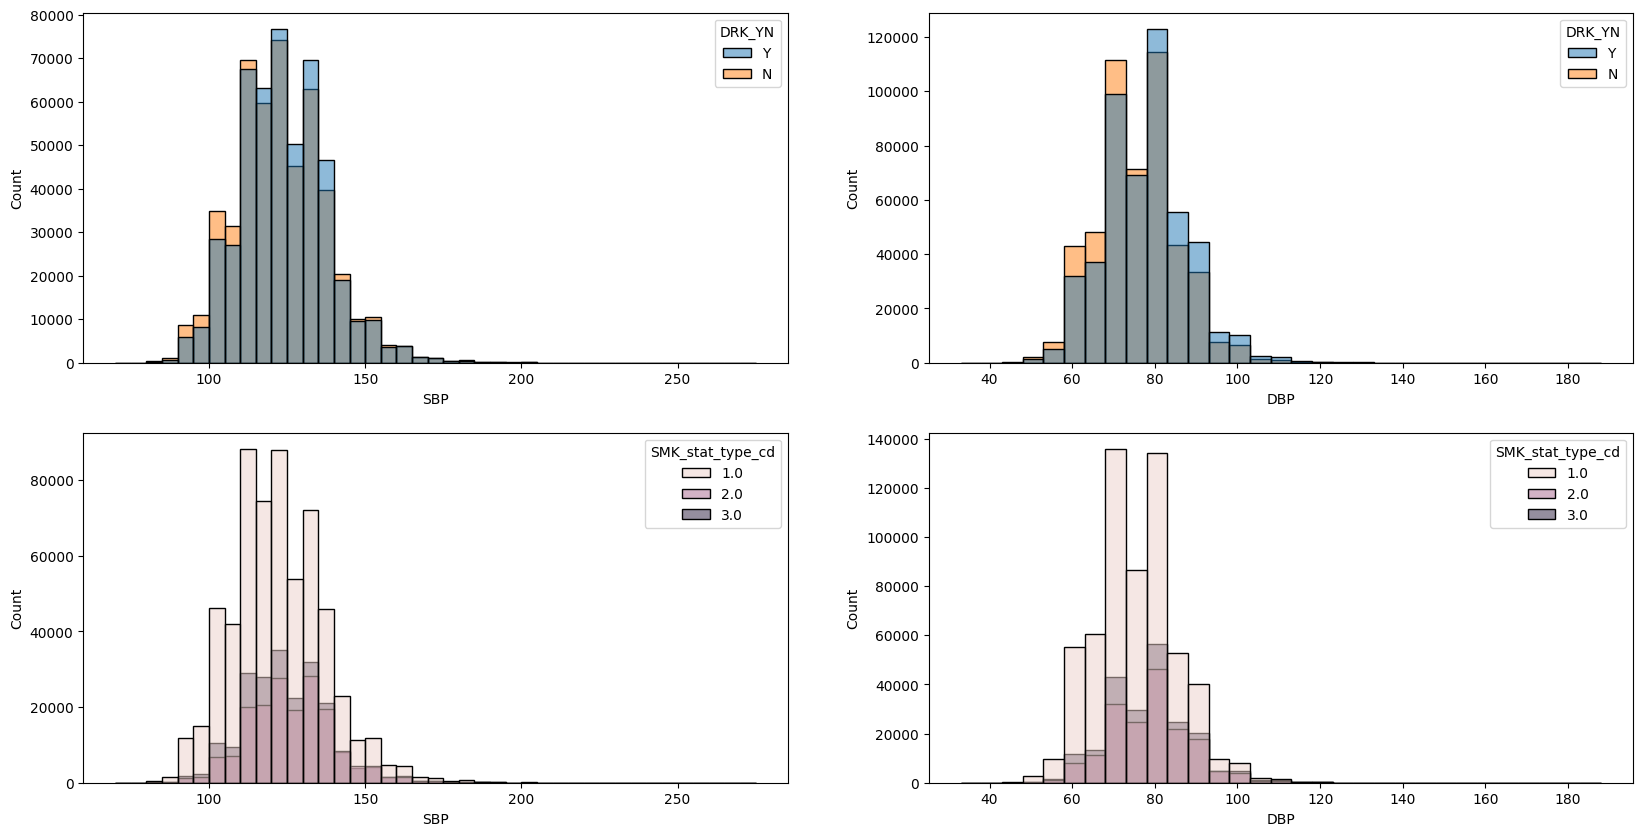

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(data=data, x="SBP", ax=axs[0][0], binwidth=5, hue="DRK_YN")
sns.histplot(data=data, x="DBP", ax=axs[0][1], binwidth=5, hue="DRK_YN")
sns.histplot(data=data, x="SBP", ax=axs[1][0], binwidth=5, hue="SMK_stat_type_cd")
sns.histplot(data=data, x="DBP", ax=axs[1][1], binwidth=5, hue="SMK_stat_type_cd")

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "SBP"], data.loc[data["DRK_YN"]=="N", "SBP"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "SBP"], data.loc[data["DRK_YN"]=="N", "SBP"]))

TtestResult(statistic=33.51927472154756, pvalue=3.4791443160094173e-246, df=985542.0)
0.06752849102517439


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "SBP"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "SBP"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=6538.441062478329, pvalue=0.0)
0.013094980932176358


In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "DBP"], data.loc[data["DRK_YN"]=="N", "DBP"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "DBP"], data.loc[data["DRK_YN"]=="N", "DBP"]))

TtestResult(statistic=100.74543539624125, pvalue=0.0, df=985542.0)
0.2029634377980439


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "DBP"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "DBP"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=10492.488245615274, pvalue=0.0)
0.02084891694935149


In [16]:
drink_weak.append("DBP")

SBP memiliki effect size yang kecil terhadap smoke dan drink.
DBP akan digunakan pada model drink sebagai feature yang lemah


## **BLDS/FSG**


kandungan gula dalam darah ketika belum mengonsumsi apa-apa<br>
rata - rata = 90-130 / 70-100

In [ ]:
data["BLDS"].describe()

count    985544.000000
mean        100.384000
std          24.126405
min          25.000000
25%          88.000000
50%          96.000000
75%         105.000000
max         852.000000
Name: BLDS, dtype: float64

<Axes: xlabel='BLDS'>

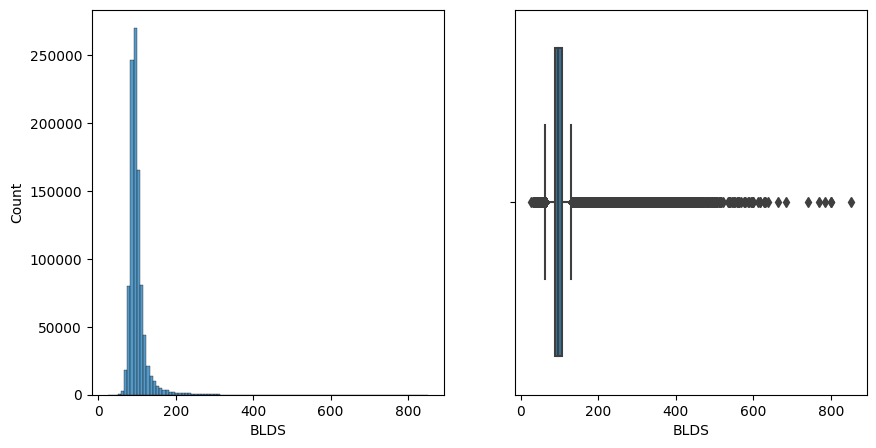

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="BLDS", bins=100, ax=axs[0])
sns.boxplot(data=data, x="BLDS", ax=axs[1])

Data BLDS sangat skewed, sehingga dilakukan log transform

In [17]:
data["BLDS"] = np.log(data["BLDS"])

<Axes: >

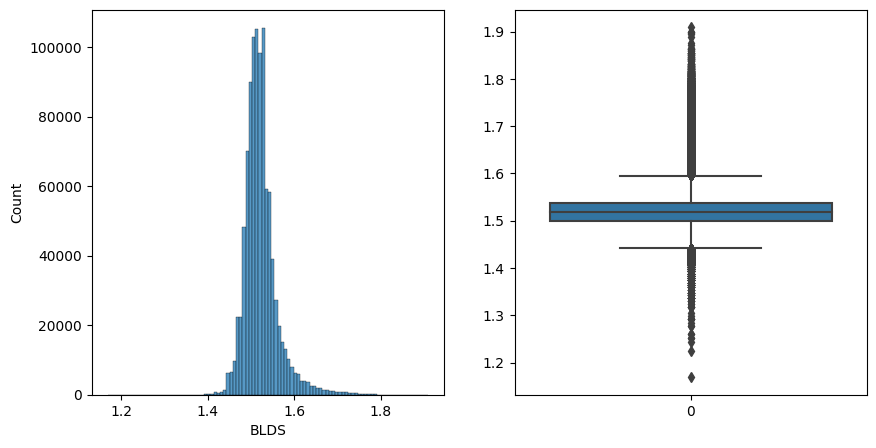

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=np.log(data["BLDS"]), bins=100, ax=axs[0])
sns.boxplot(data=np.log(data["BLDS"]), ax=axs[1])

<Axes: xlabel='BLDS', ylabel='Count'>

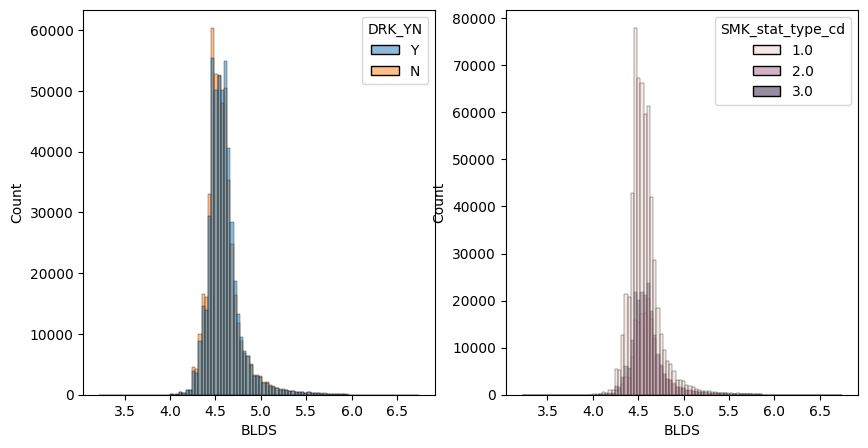

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="BLDS", bins=100, ax=axs[0], hue="DRK_YN")
sns.histplot(data=data, x="BLDS", bins=100, ax=axs[1], hue="SMK_stat_type_cd")

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "BLDS"], data.loc[data["DRK_YN"]=="N", "BLDS"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "BLDS"], data.loc[data["DRK_YN"]=="N", "BLDS"]))

TtestResult(statistic=21.491554379547704, pvalue=1.9718146576962105e-102, df=985542.0)
0.04329724461798645


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "BLDS"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "BLDS"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=6849.567367718853, pvalue=0.0)
0.013709552147906135


BLDS akan tidak berpengaruh besar pada smoke dan drink karena effect size yang sangat kecil


## **Cholesterol**

Total Cholesterol, HDL (high density lippoprotein (baik)), LDL (low density lippoprotein (jahat)), dan triglyceride<br>
total cholesterol = hdl + ldl + (1/5)triglyceride<br>

triglyceride adalah lemak yg umum ditemukan dalam tubuh<br>
jumlah sehat < 150 mg/dl untuk orang dewasa

total cholestrol < 200 sehat
hdl > 40
ldl < 100

<Axes: xlabel='triglyceride'>

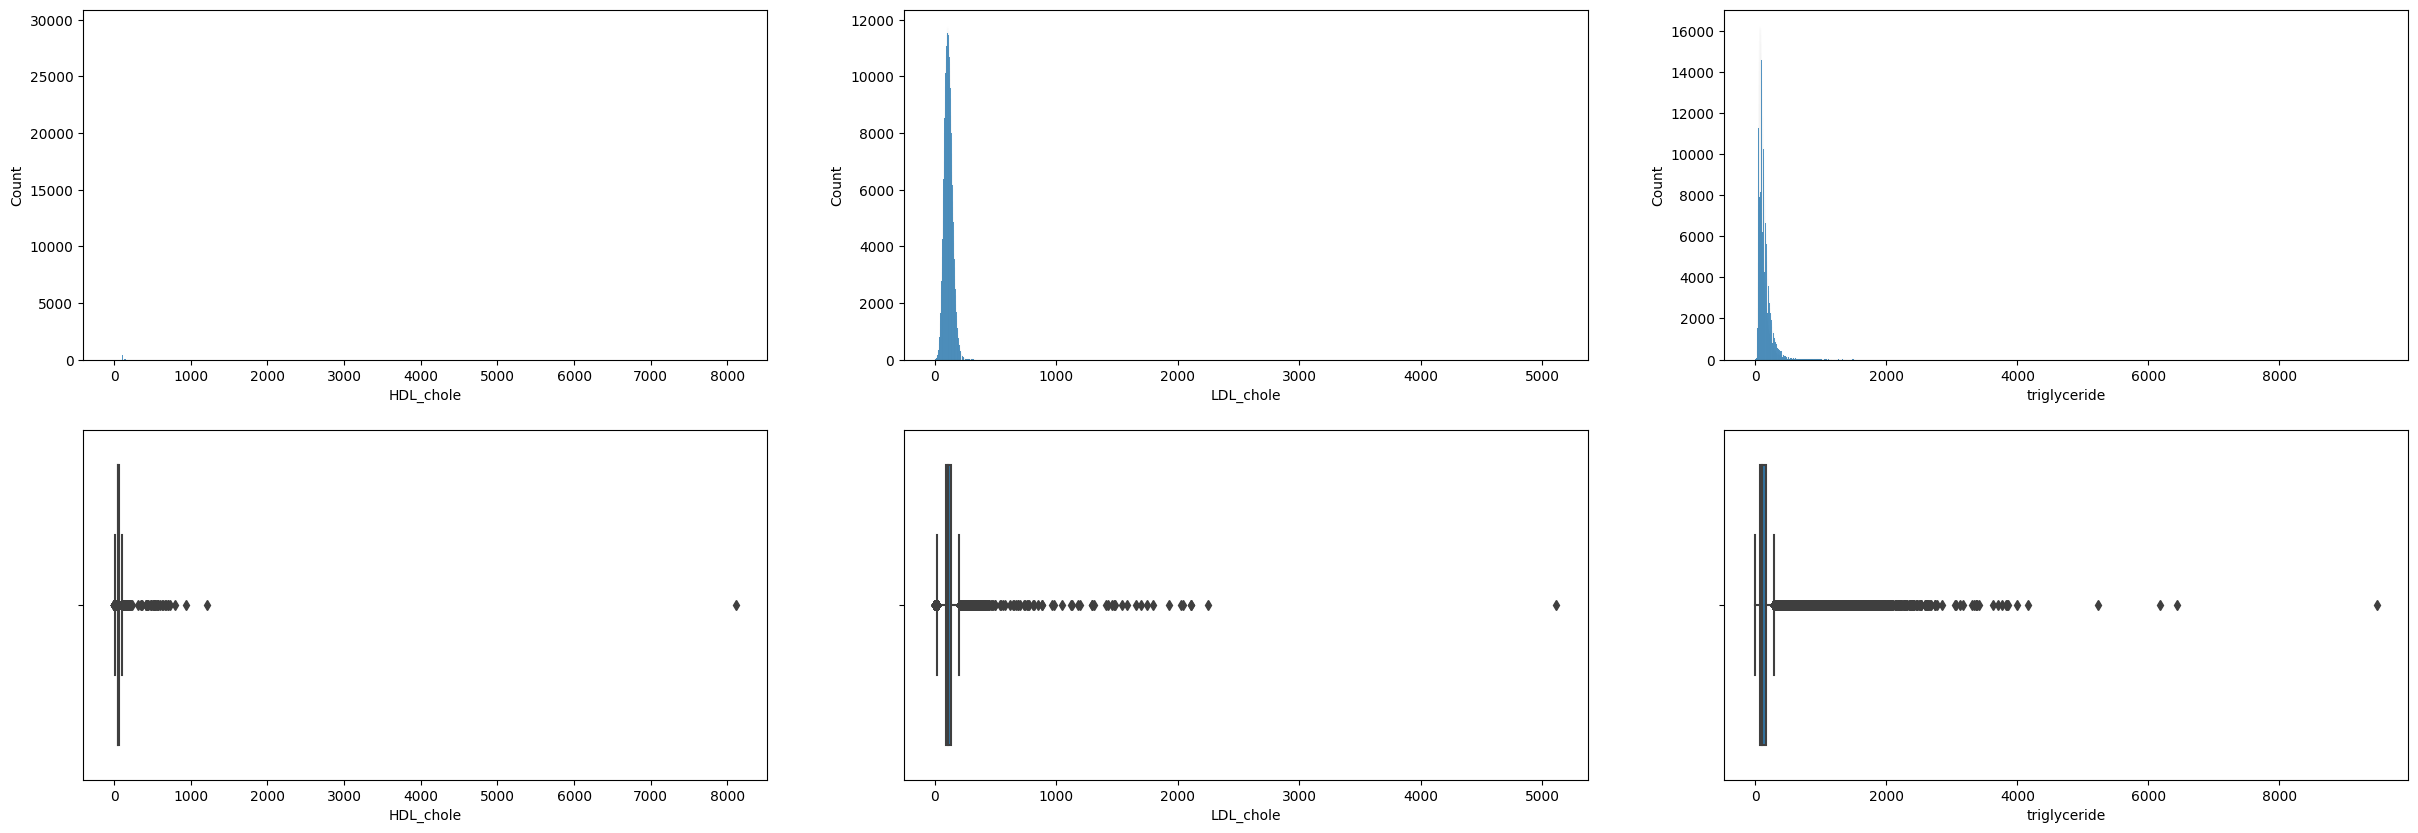

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))
sns.histplot(data=data, x="HDL_chole", ax=axs[0, 0])
sns.histplot(data=data, x="LDL_chole", ax=axs[0, 1])
sns.histplot(data=data, x="triglyceride", ax=axs[0, 2])
sns.boxplot(data=data, x="HDL_chole", ax=axs[1,0])
sns.boxplot(data=data, x="LDL_chole", ax=axs[1,1])
sns.boxplot(data=data, x="triglyceride", ax=axs[1,2])

In [18]:
data["triglyceride"].sort_values(ascending = False)

7075      9490.0
105334    6430.0
220459    6173.0
81001     5236.0
726009    4164.0
           ...  
941920       2.0
12812        1.0
176478       1.0
157043       1.0
799245       1.0
Name: triglyceride, Length: 985601, dtype: float64

Terdapat kejanggalan dalam data hdl, ldl, dan triglyceride<br>
tingkat triglyceride tertinggi yang pernah tercatat adalah 4,155 mg/dl namun kita memiliki beberapa data dimana yang melebihi itu.<br>

<Axes: xlabel='triglyceride'>

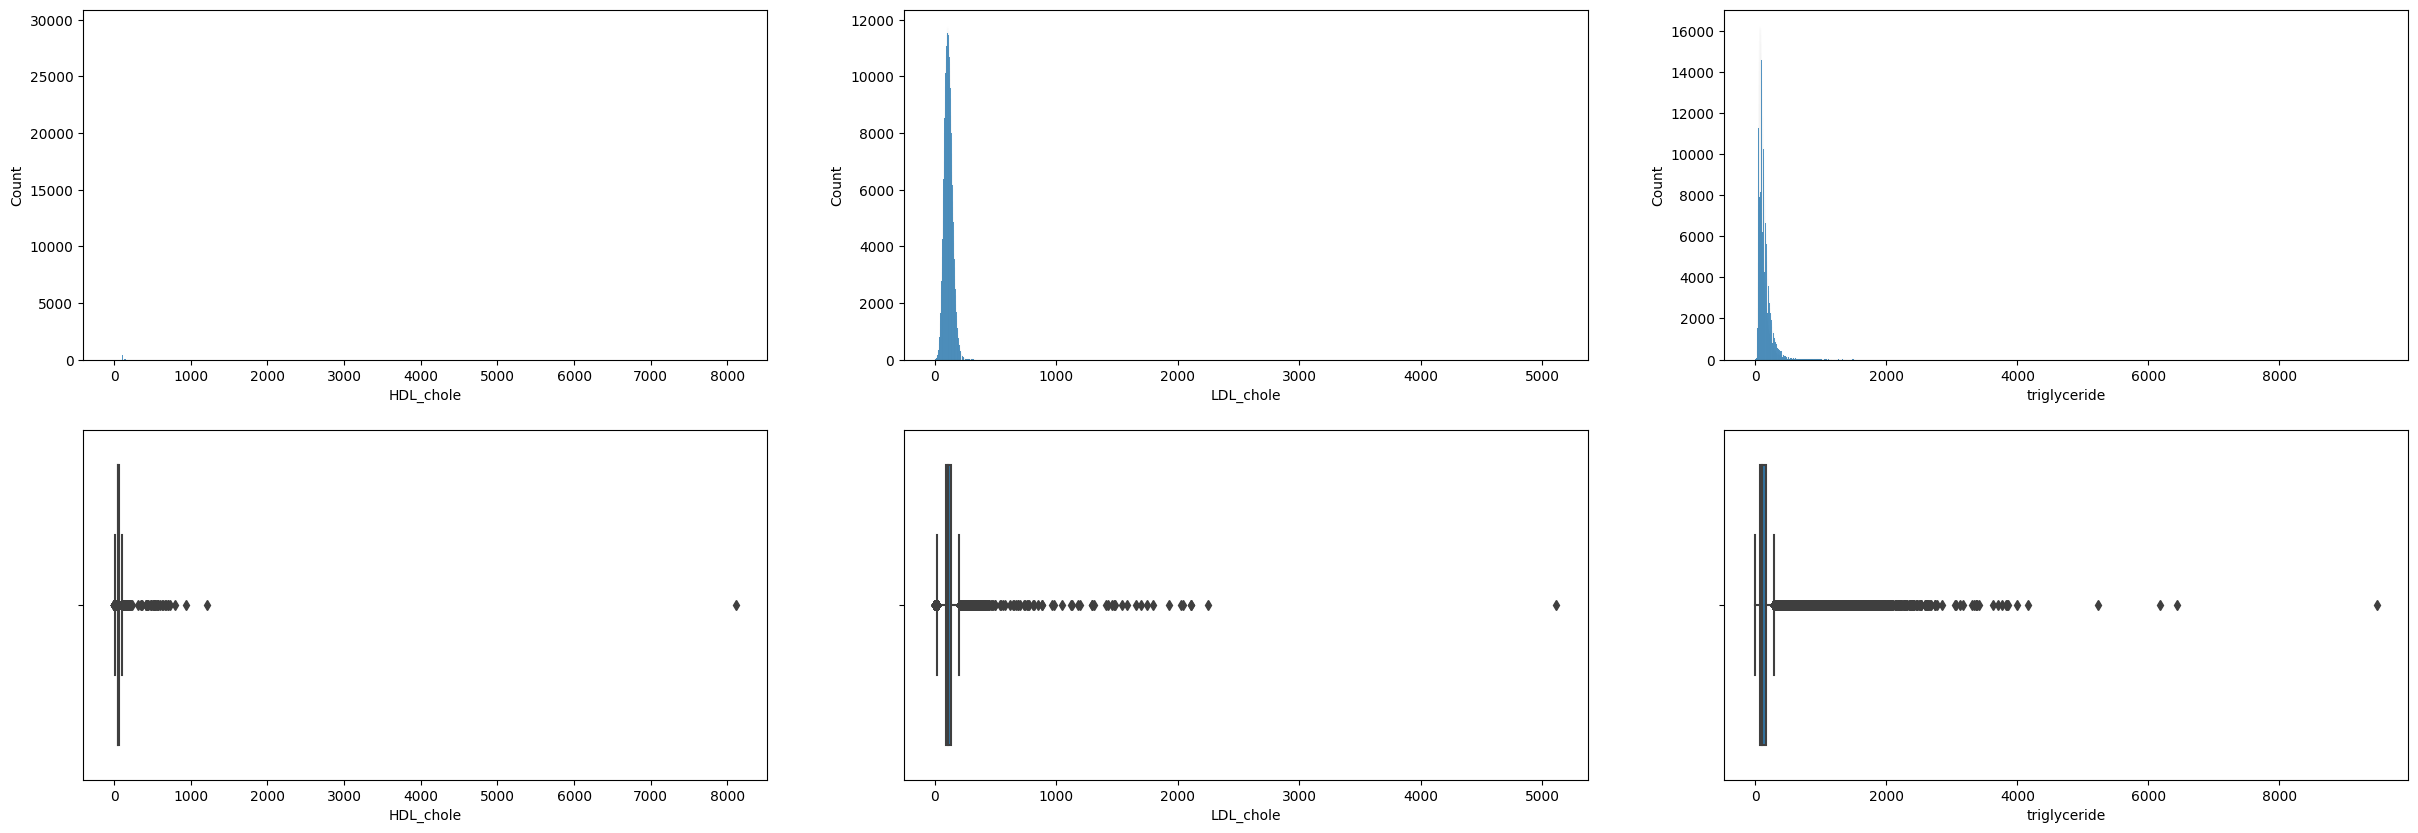

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(30, 10))
sns.histplot(data=data, x="HDL_chole", ax=axs[0, 0])
sns.histplot(data=data, x="LDL_chole", ax=axs[0, 1])
sns.histplot(data=data, x="triglyceride", ax=axs[0, 2])
sns.boxplot(data=data, x="HDL_chole", ax=axs[1,0])
sns.boxplot(data=data, x="LDL_chole", ax=axs[1,1])
sns.boxplot(data=data, x="triglyceride", ax=axs[1,2])

Total cholesterol dapat dihitung dengan rumus:<br>HDL + LDL + 1/5*triglyceride

In [19]:
data_tot = data["tot_chole"]
calc_tot = (data["HDL_chole"]+data["LDL_chole"]+((1/5)*(data["triglyceride"])))
diff = abs(data_tot-calc_tot)
totals = {"total_data" : data_tot, "total_calc" : calc_tot, "diff" : abs(data_tot - calc_tot)}
totals = pd.DataFrame(totals)
print(totals.shape[0])
print(totals.loc[totals["diff"]>0, :].shape[0])
totals.sort_values(by="diff", ascending=False)

985601
805527


,total_data,total_calc,diff
7075,1619.0,15127.0,13508.0
815086,324.0,2235.6,1911.6
108418,234.0,1826.8,1592.8
98055,257.0,1767.2,1510.2
146293,270.0,1627.2,1357.2
...,...,...,...
824349,191.0,191.0,0.0
278655,246.0,246.0,0.0
130775,164.0,164.0,0.0
824353,200.0,200.0,0.0


<Axes: xlabel='diff'>

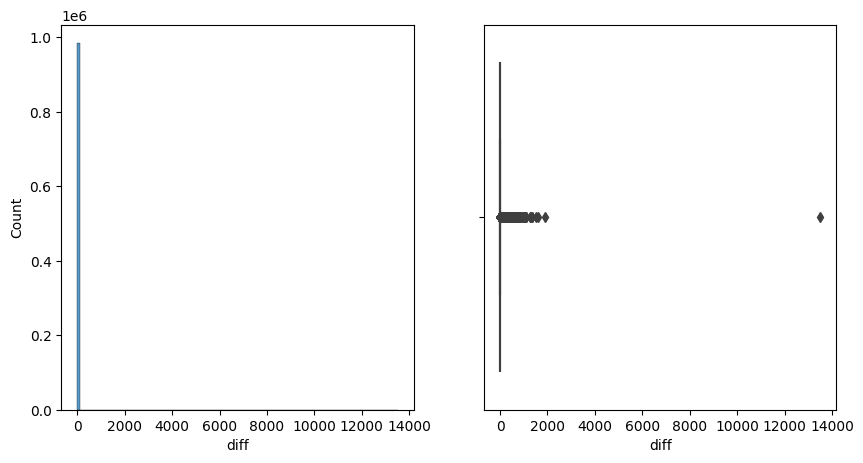

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=totals, x="diff", bins=100, ax=axs[0])
sns.boxplot(data=totals, x="diff", ax=axs[1])

In [19]:
totals["diff"].describe()

count    985601.000000
mean          1.658226
std          17.247443
min           0.000000
25%           0.200000
50%           0.400000
75%           0.600000
max       13508.000000
Name: diff, dtype: float64

Ditemukan banyak ketidakcocokan yanng cukup besar untuk total cholesterol di data dan yang didapatkan dari rumus

Kita memutuskan untuk mengimputasi keseluruhan total cholesterol dengan nilai yang didapatkan dengan rumus

In [20]:
data["tot_chole"] = calc_tot

<Axes: xlabel='tot_chole'>

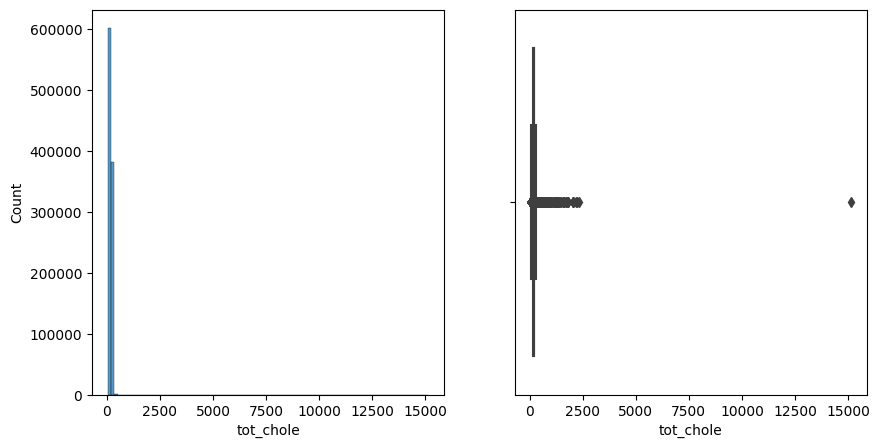

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="tot_chole", bins=100, ax=axs[0])
sns.boxplot(data=data, x="tot_chole", ax=axs[1])

Total kolesterol yang sehat < 200 <br>
Total kolesterol yang berisiko 200 - 240<br>
Total kolesterol yang tidak sehat > 240<br>

https://www.nzherald.co.nz/nz/its-a-cholesterol-record-43/KCNZFC6CPA5RAXGRIH22ITWSN4/
Menurut artikel tersebut, terdapat seseorang dengan total kolesterol 43 mmol/L atau 774 mg/dL

sehingga, kami akan membuang semua data dimana total cholesterol > 700 karena merasa bahwa outlier tersebut terjadi karena measurement error

In [21]:
data.loc[data["tot_chole"]>700, :].shape[0]

87

In [22]:
data = data.loc[data["tot_chole"]<=700, :]

<Axes: xlabel='tot_chole'>

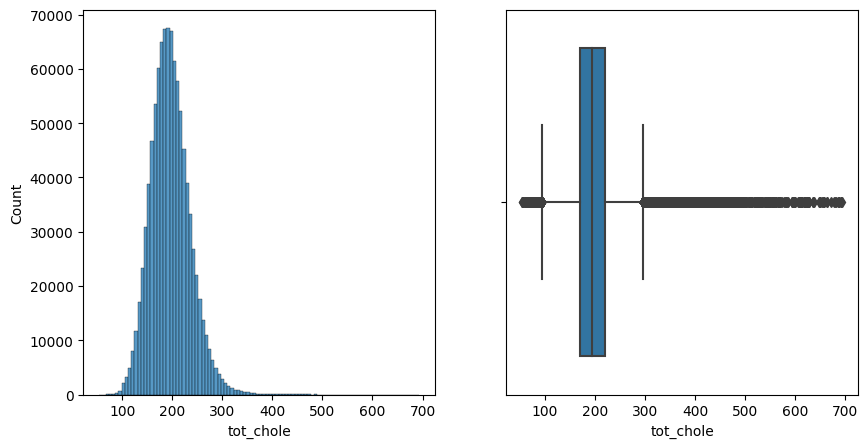

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="tot_chole", bins=100, ax=axs[0])
sns.boxplot(data=data, x="tot_chole", ax=axs[1])

Log transformm untuk tot_chole

In [23]:
data["tot_chole"] = np.log(data["tot_chole"])

<Axes: xlabel='tot_chole'>

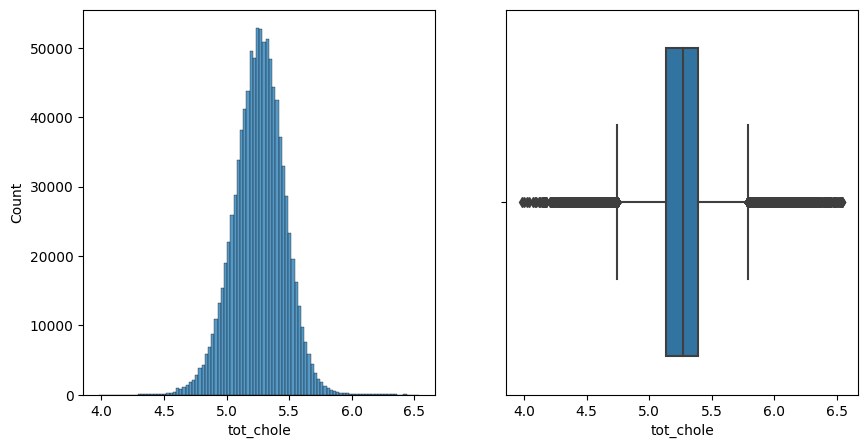

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="tot_chole", bins=100, ax=axs[0])
sns.boxplot(data=data, x="tot_chole", ax=axs[1])

<Axes: xlabel='tot_chole', ylabel='Count'>

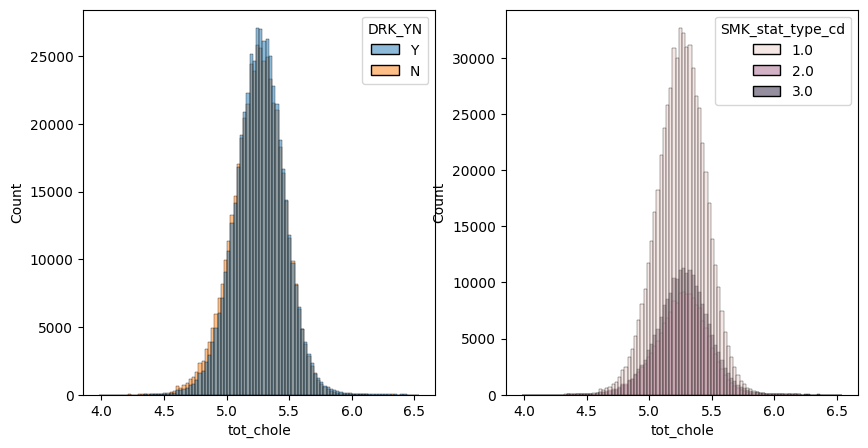

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
sns.histplot(data=data, x="tot_chole", bins=100, ax=axs[0], hue="DRK_YN")
sns.histplot(data=data, x="tot_chole", bins=100, ax=axs[1], hue="SMK_stat_type_cd")

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "tot_chole"], data.loc[data["DRK_YN"]=="N", "tot_chole"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "tot_chole"], data.loc[data["DRK_YN"]=="N", "tot_chole"]))

TtestResult(statistic=35.46516435337132, pvalue=2.530605549536036e-275, df=985455.0)
0.07145186446082774


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "tot_chole"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "tot_chole"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=353.55975556187354, pvalue=3.206364584210626e-154)
0.0007170425776613197


tot_chole memiliki pengaruh yang sangat kecil terhadap drink dan smoke

HDL, LDL, dan triglyceride tidak perlu dipakai karena tot_chole sudah merupakan kombinasi linear dari ketiga fitur tersebut

In [24]:
data = data.drop(["HDL_chole", "LDL_chole", "triglyceride"], axis=1)

## **Hemoglobin**

<Axes: xlabel='hemoglobin'>

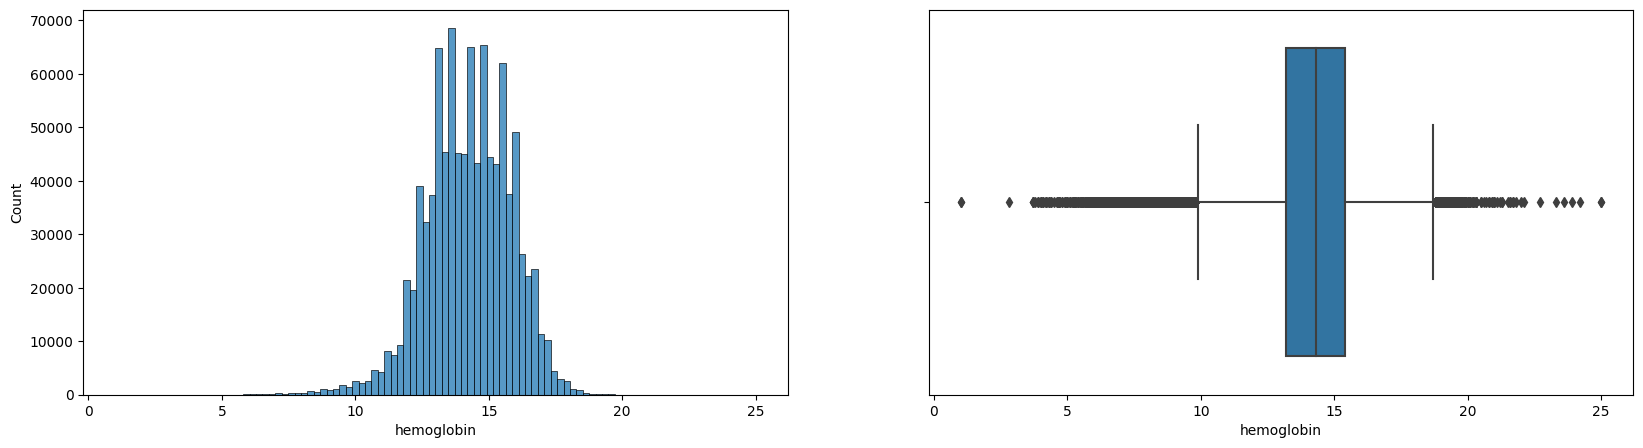

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="hemoglobin", bins=100, ax=axs[0])
sns.boxplot(data=data, x="hemoglobin", ax=axs[1])

<Axes: xlabel='hemoglobin', ylabel='Count'>

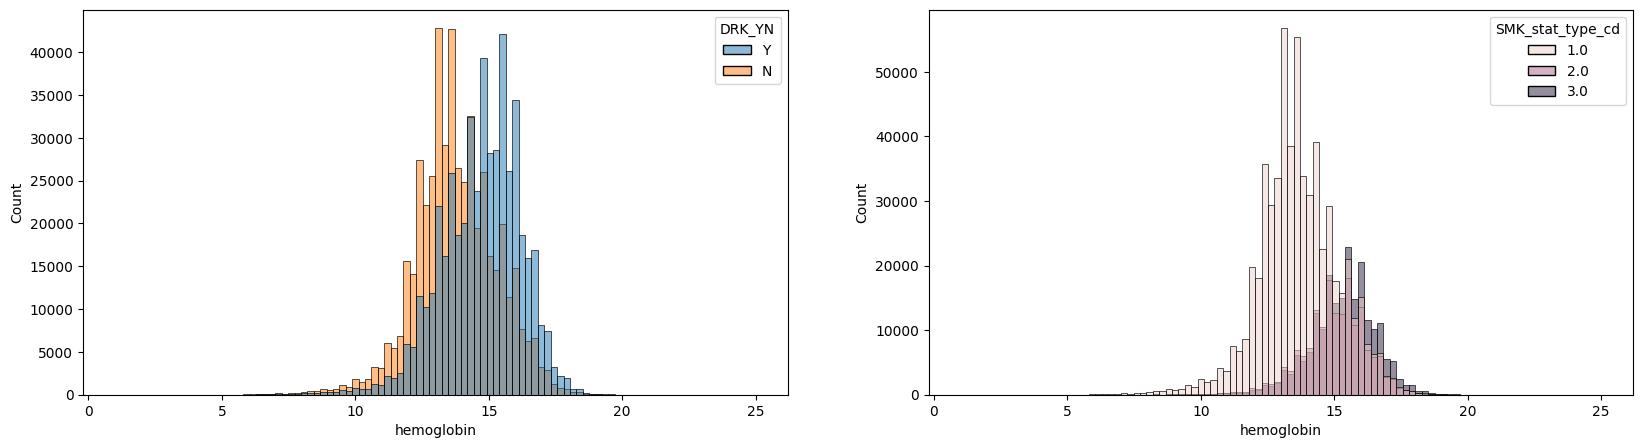

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="hemoglobin", bins=100, ax=axs[0], hue="DRK_YN")
sns.histplot(data=data, x="hemoglobin", bins=100, ax=axs[1], hue="SMK_stat_type_cd")

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "hemoglobin"], data.loc[data["DRK_YN"]=="N", "hemoglobin"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "hemoglobin"], data.loc[data["DRK_YN"]=="N", "hemoglobin"]))

TtestResult(statistic=310.84193619607026, pvalue=0.0, df=985455.0)
0.6262549828480231


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "hemoglobin"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "hemoglobin"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=139099.52091140996, pvalue=0.0)
0.22015460938669998


In [25]:
drink_sig.append("hemoglobin")
smk_weak.append("hemoglobin")

hemoglobin akan digunakan dalam model drink sebagai fitur signifikan karena effect size yang cukup besar dan digunakan dalam model smoke sebagai fitur weak karena memiliki effect size yang relatif kecil

## **Urine Protein**

In [ ]:
data["urine_protein"].describe()

count    985457.000000
mean          1.093741
std           0.436199
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           6.000000
Name: urine_protein, dtype: float64

<Axes: xlabel='urine_protein', ylabel='count'>

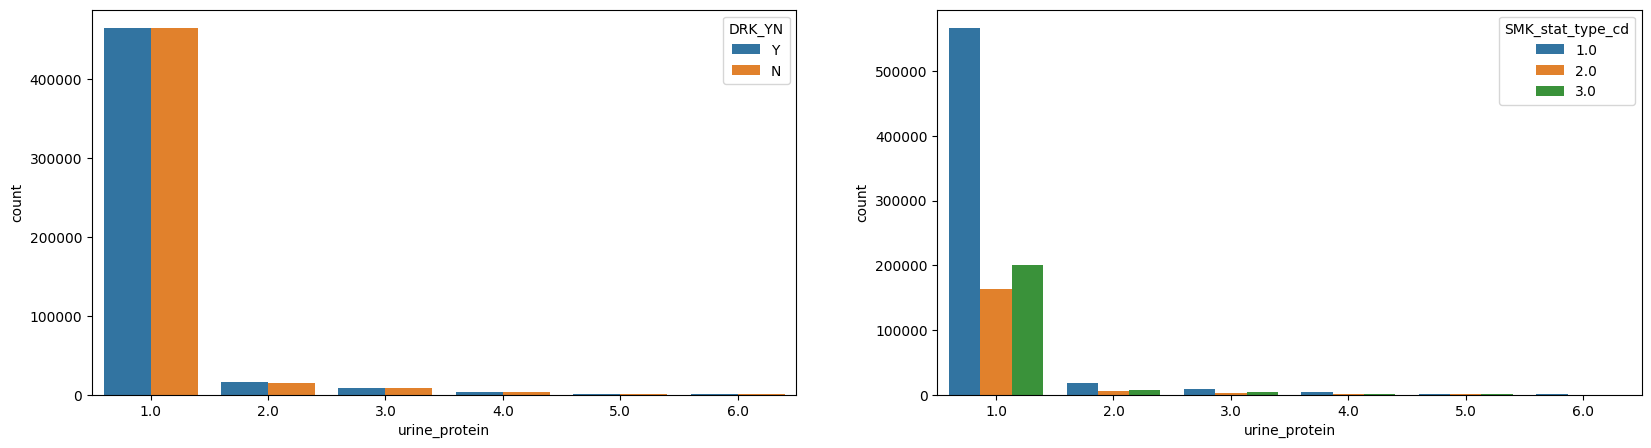

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.countplot(data=data, x="urine_protein", ax=axs[0], hue="DRK_YN")
sns.countplot(data=data, x="urine_protein", ax=axs[1], hue="SMK_stat_type_cd")

In [26]:
table = pd.crosstab(data["urine_protein"], data["DRK_YN"])
res = stats.chi2_contingency(table)

print(res[0], res[1])
print(stats.contingency.association(table))

302.11329713456666 3.5181149249374193e-63
0.01750868467197609


In [27]:
table = pd.crosstab(data["urine_protein"], data["SMK_stat_type_cd"])
res = stats.chi2_contingency(table)

print(res[0], res[1])
print(stats.contingency.association(table))

390.1926276958379 1.1494290161161917e-77
0.01406996875089175


Urine protein memiliki effect size yang kecil terhadap smoke dan drink

## **Serum creatinine**

Serum (blood) creatinine adalah sebuah test untuk memeriksa kemampuan ginjal dalam menyaring darah

Creatinine adalah buangan dari hasil pencernaan protein

Normal results (mg/dL):<br>
men : 0.7-1.3 <br>
women : 0.6-1.1<br>

In [ ]:
data["serum_creatinine"].describe()

count    985457.000000
mean          0.860013
std           0.479266
min           0.100000
25%           0.700000
50%           0.800000
75%           1.000000
max          98.000000
Name: serum_creatinine, dtype: float64

<Axes: xlabel='serum_creatinine'>

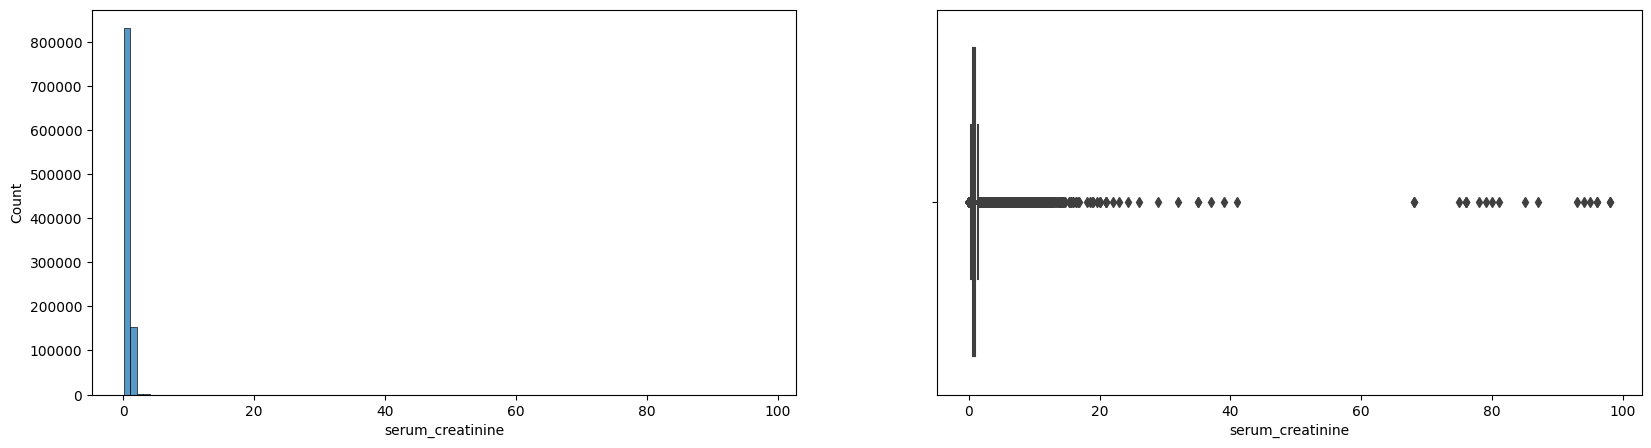

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="serum_creatinine", bins=100, ax=axs[0])
sns.boxplot(data=data, x="serum_creatinine", ax=axs[1])

level creatinine tertinggi yang pernah tercatat adalah 78mg/dL dimana rekor sebelumnya adalah 53:
https://www.researchgate.net/publication/355236059_Highest_Recorded_Serum_Creatinine


Kami memutuskan untuk melakukan cut off di nilai 20

In [26]:
data = data.loc[data["serum_creatinine"]<=20, :]

<Axes: xlabel='serum_creatinine'>

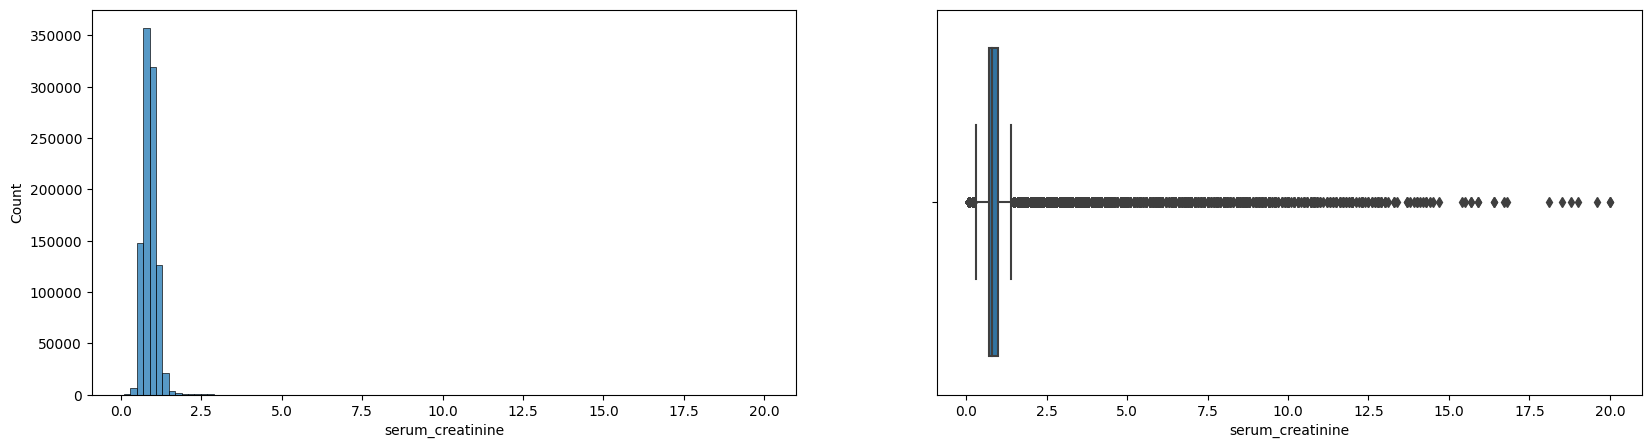

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="serum_creatinine", bins=100, ax=axs[0])
sns.boxplot(data=data, x="serum_creatinine", ax=axs[1])

Karena distribusi datanya skewed, maka kita akan lakukan log transform

In [27]:
data["serum_creatinine"] = np.log(data["serum_creatinine"])

<Axes: xlabel='serum_creatinine'>

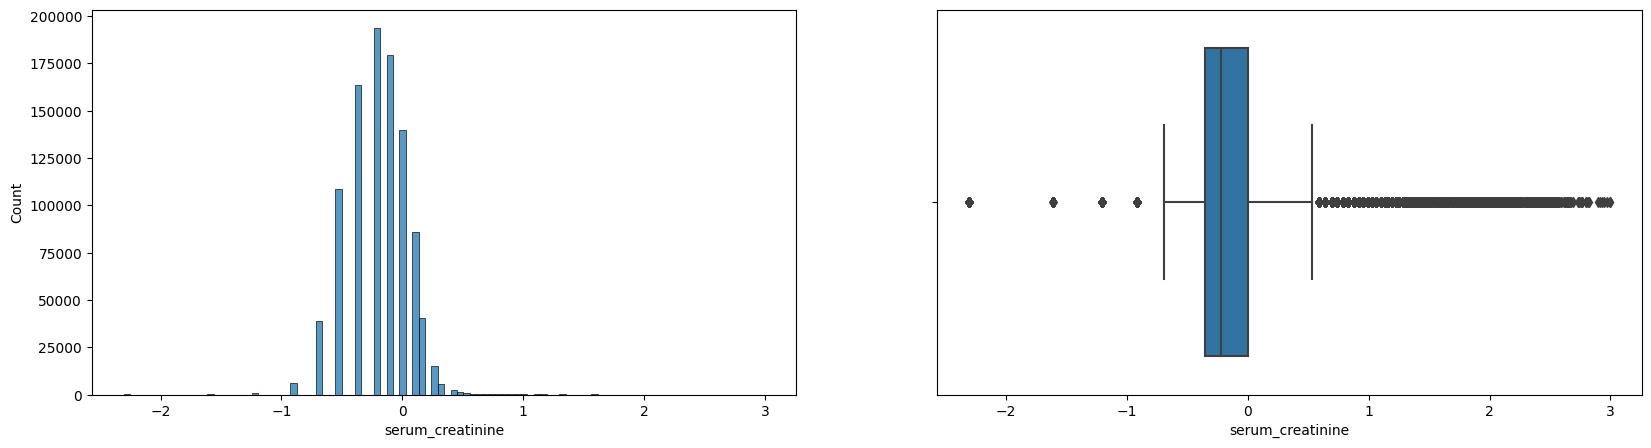

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="serum_creatinine", bins=100, ax=axs[0])
sns.boxplot(data=data, x="serum_creatinine", ax=axs[1])

<Axes: xlabel='serum_creatinine', ylabel='Count'>

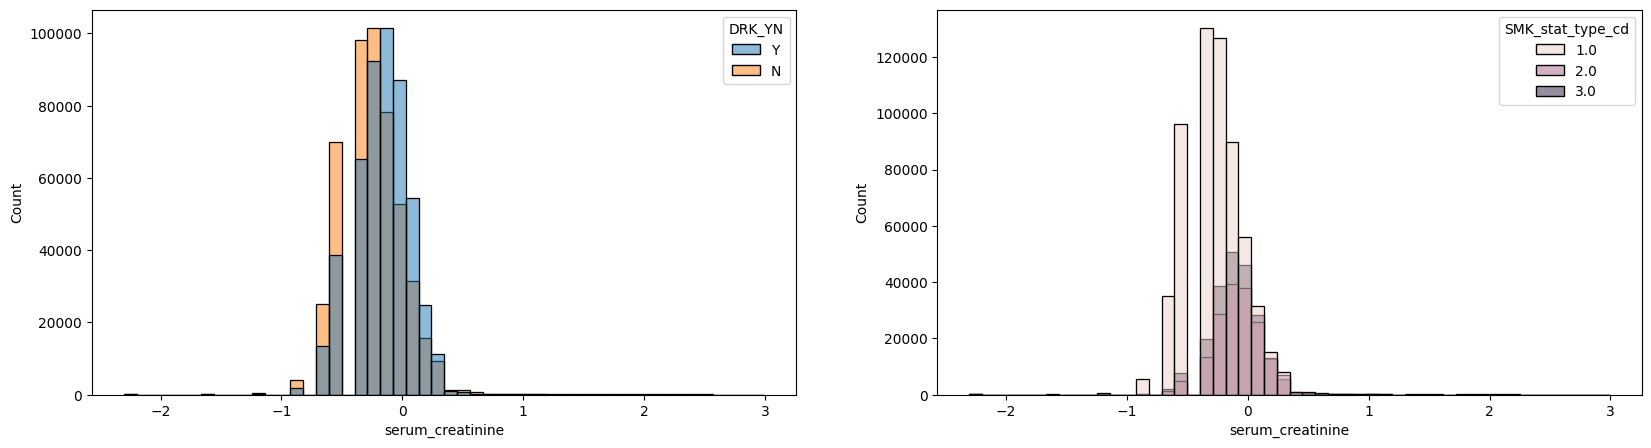

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="serum_creatinine", bins=50, ax=axs[0], hue="DRK_YN")
sns.histplot(data=data, x="serum_creatinine", bins=50, ax=axs[1], hue="SMK_stat_type_cd")

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"]=="Y", "serum_creatinine"], data.loc[data["DRK_YN"]=="N", "serum_creatinine"]))
print(cohen(data.loc[data["DRK_YN"]=="Y", "serum_creatinine"], data.loc[data["DRK_YN"]=="N", "serum_creatinine"]))

TtestResult(statistic=162.9085266146677, pvalue=0.0, df=985422.0)
0.32821821245570826


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "serum_creatinine"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "serum_creatinine"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=66955.16888612769, pvalue=0.0)
0.11963422558933233


In [28]:
drink_weak.append("serum_creatine")
smk_weak.append("serum_creatine")

creatinine akan digunakan dalam model drink dan smoke sebagai fitur weak karena memiliki effect size yang relatif kecil

## **SGOT_AST , SGOT_ALT**

SGOT = Glutamate-oxaloacetate transaminase

SGOT adalah test untuk memeriksa kerusakan hati/liver


AST = Aspartate transaminase IU/L
ALT = Alanine transaminase IU/L

ALT: 5-40 IU/L
AST: 7 - 56 IU/L

https://www.medicinenet.com/liver_blood_tests/article.htm


In [ ]:
data[["SGOT_AST", "SGOT_ALT"]].describe()

,SGOT_AST,SGOT_ALT
count,985424.000000,985424.000000
mean,25.983162,25.761447
std,23.524281,26.347979
min,1.000000,1.000000
25%,19.000000,15.000000
50%,23.000000,20.000000
75%,28.000000,29.000000
max,9999.000000,7210.000000


<Axes: xlabel='SGOT_ALT'>

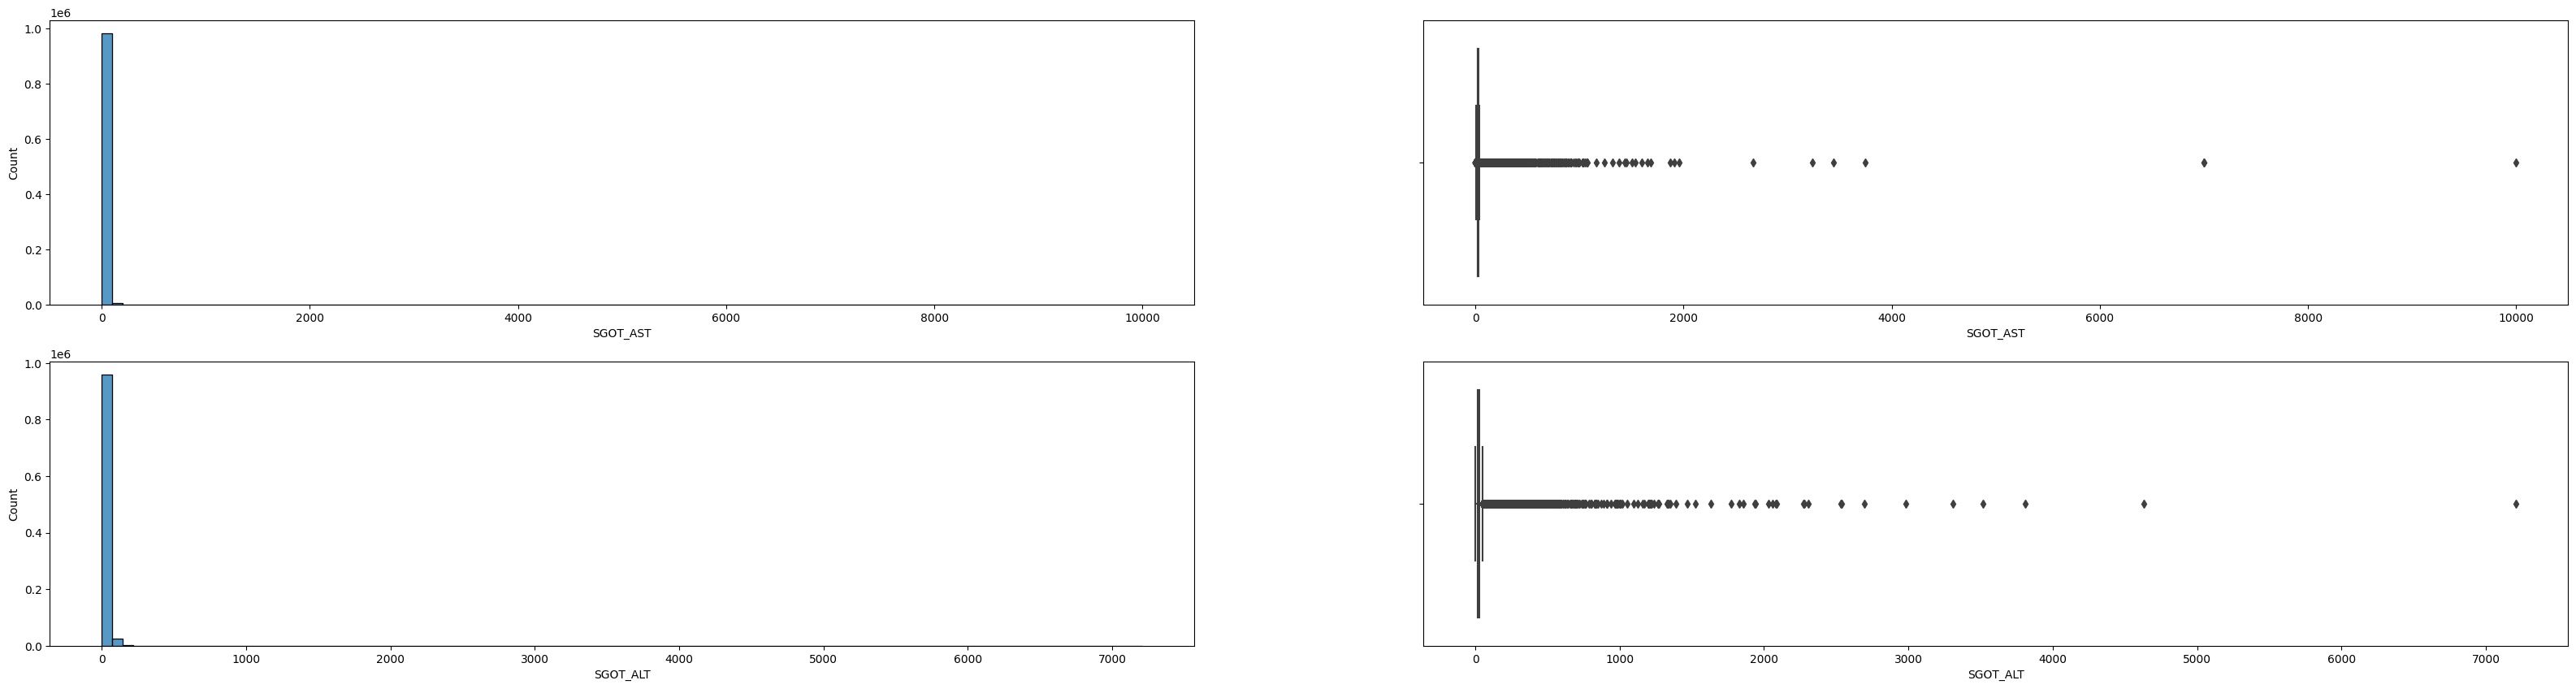

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(40, 10))
sns.histplot(data=data, x="SGOT_AST", bins=100, ax=axs[0][0])
sns.boxplot(data=data, x="SGOT_AST", ax=axs[0][1])
sns.histplot(data=data, x="SGOT_ALT", bins=100, ax=axs[1][0])
sns.boxplot(data=data, x="SGOT_ALT", ax=axs[1][1])

Kami menemukan instansi SGOT/AST dengan nilai 4942 dan SGPT/ALT dengan nilai 1306

Kami akan membuang data dengan SGOT_AST > 4000 dan SGOT_ALT > 2000 karena menurut kami data tersebut termasuk outlier dikarenakan measurement eror

In [29]:
data = data.loc[(data["SGOT_AST"]<4000) & (data["SGOT_ALT"]<2000), :]

<Axes: xlabel='SGOT_ALT'>

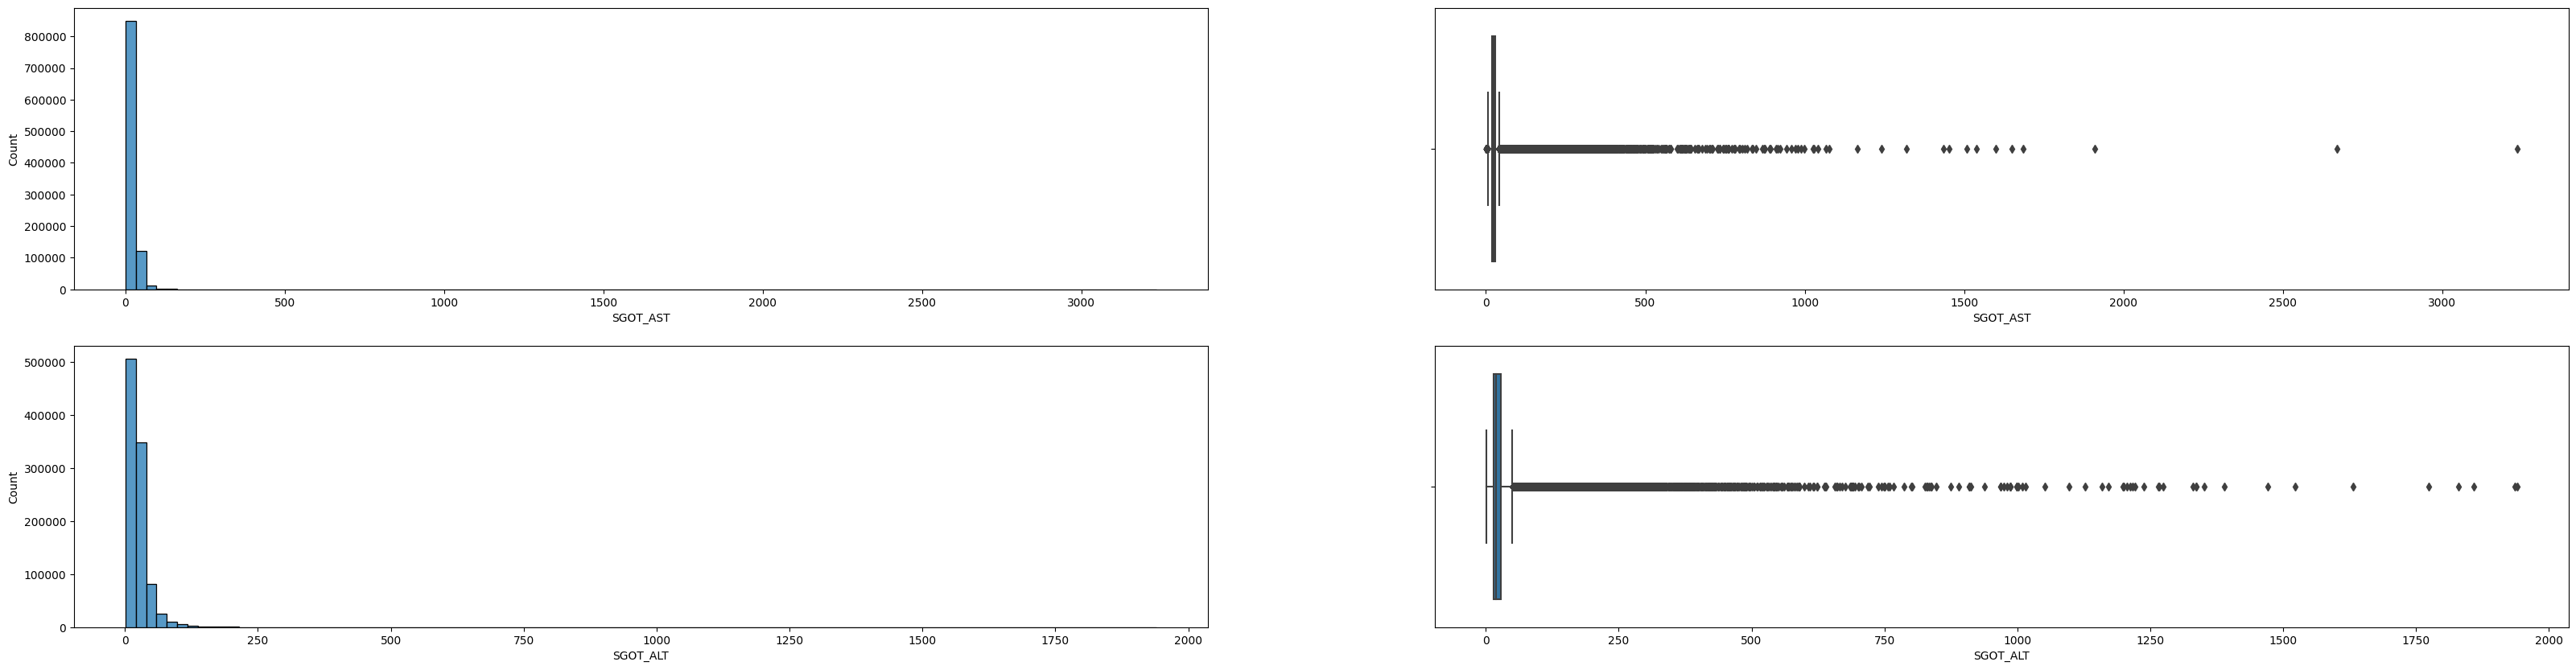

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(40, 10))
sns.histplot(data=data, x="SGOT_AST", bins=100, ax=axs[0][0])
sns.boxplot(data=data, x="SGOT_AST", ax=axs[0][1])
sns.histplot(data=data, x="SGOT_ALT", bins=100, ax=axs[1][0])
sns.boxplot(data=data, x="SGOT_ALT", ax=axs[1][1])

Log transform untuk SGOT_ALT dan SGOT_AST

In [30]:
data["SGOT_ALT"] = np.log(data["SGOT_ALT"])
data["SGOT_AST"] = np.log(data["SGOT_AST"])

<Axes: xlabel='SGOT_ALT'>

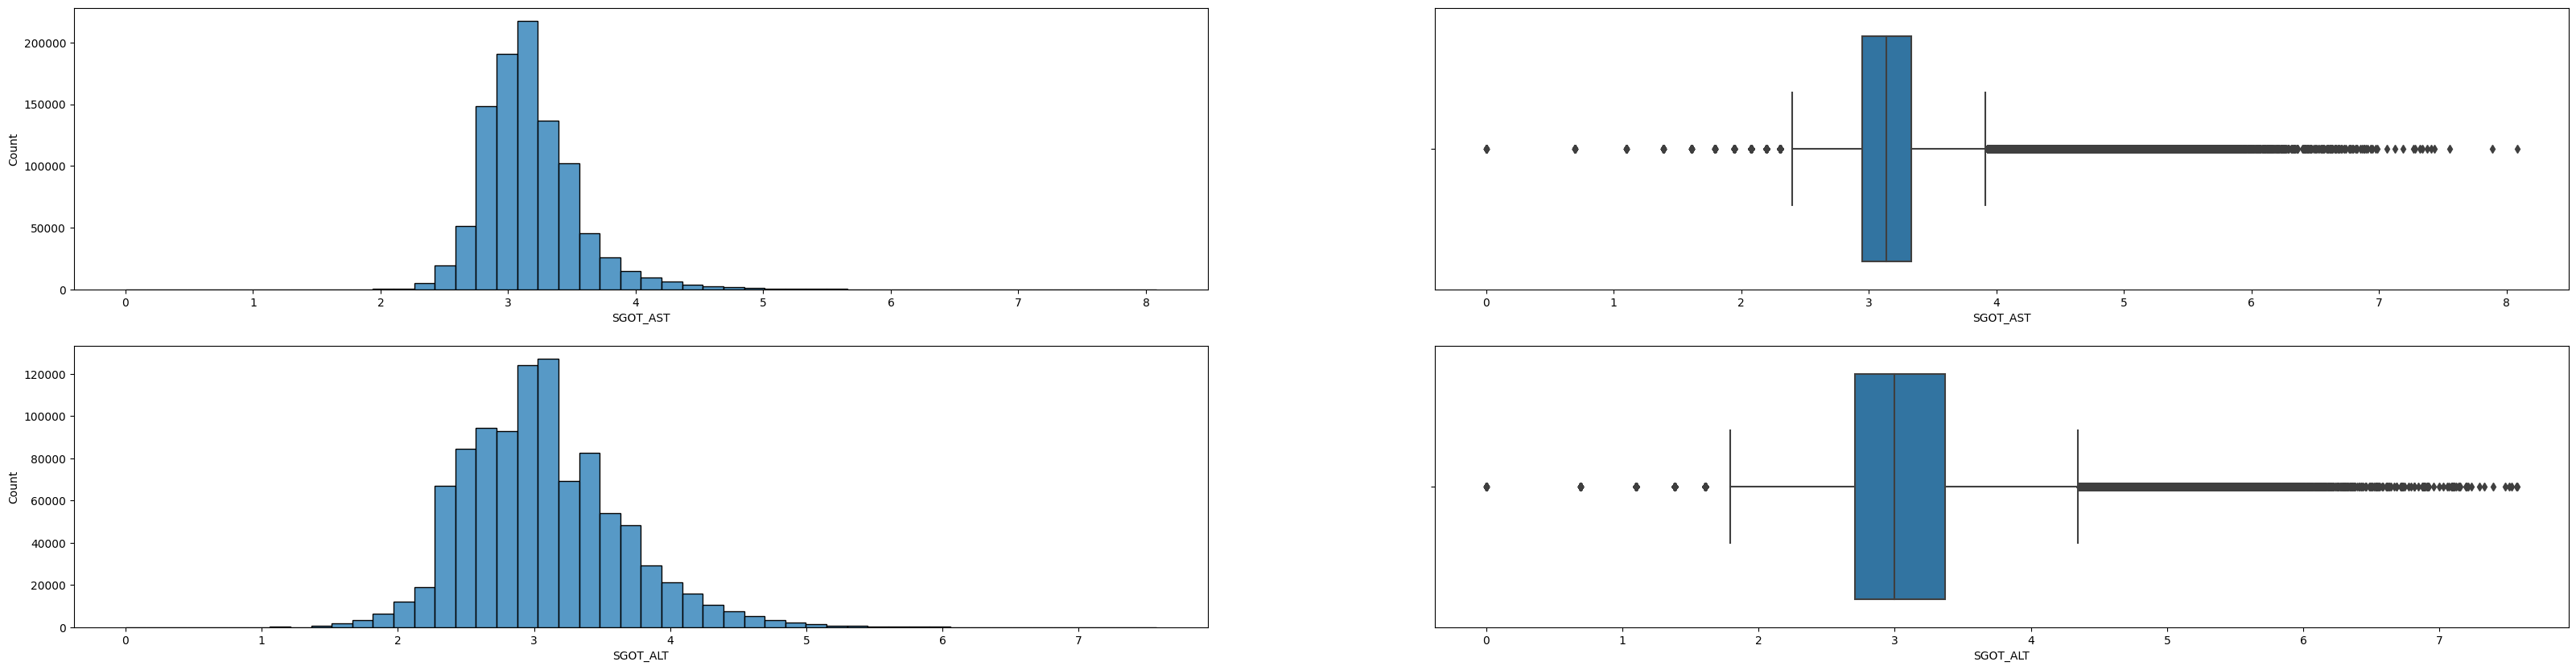

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(40, 10))
sns.histplot(data=data, x="SGOT_AST", bins=50, ax=axs[0][0])
sns.boxplot(data=data, x="SGOT_AST", ax=axs[0][1])
sns.histplot(data=data, x="SGOT_ALT", bins=50, ax=axs[1][0])
sns.boxplot(data=data, x="SGOT_ALT", ax=axs[1][1])

<Axes: xlabel='SGOT_ALT', ylabel='Count'>

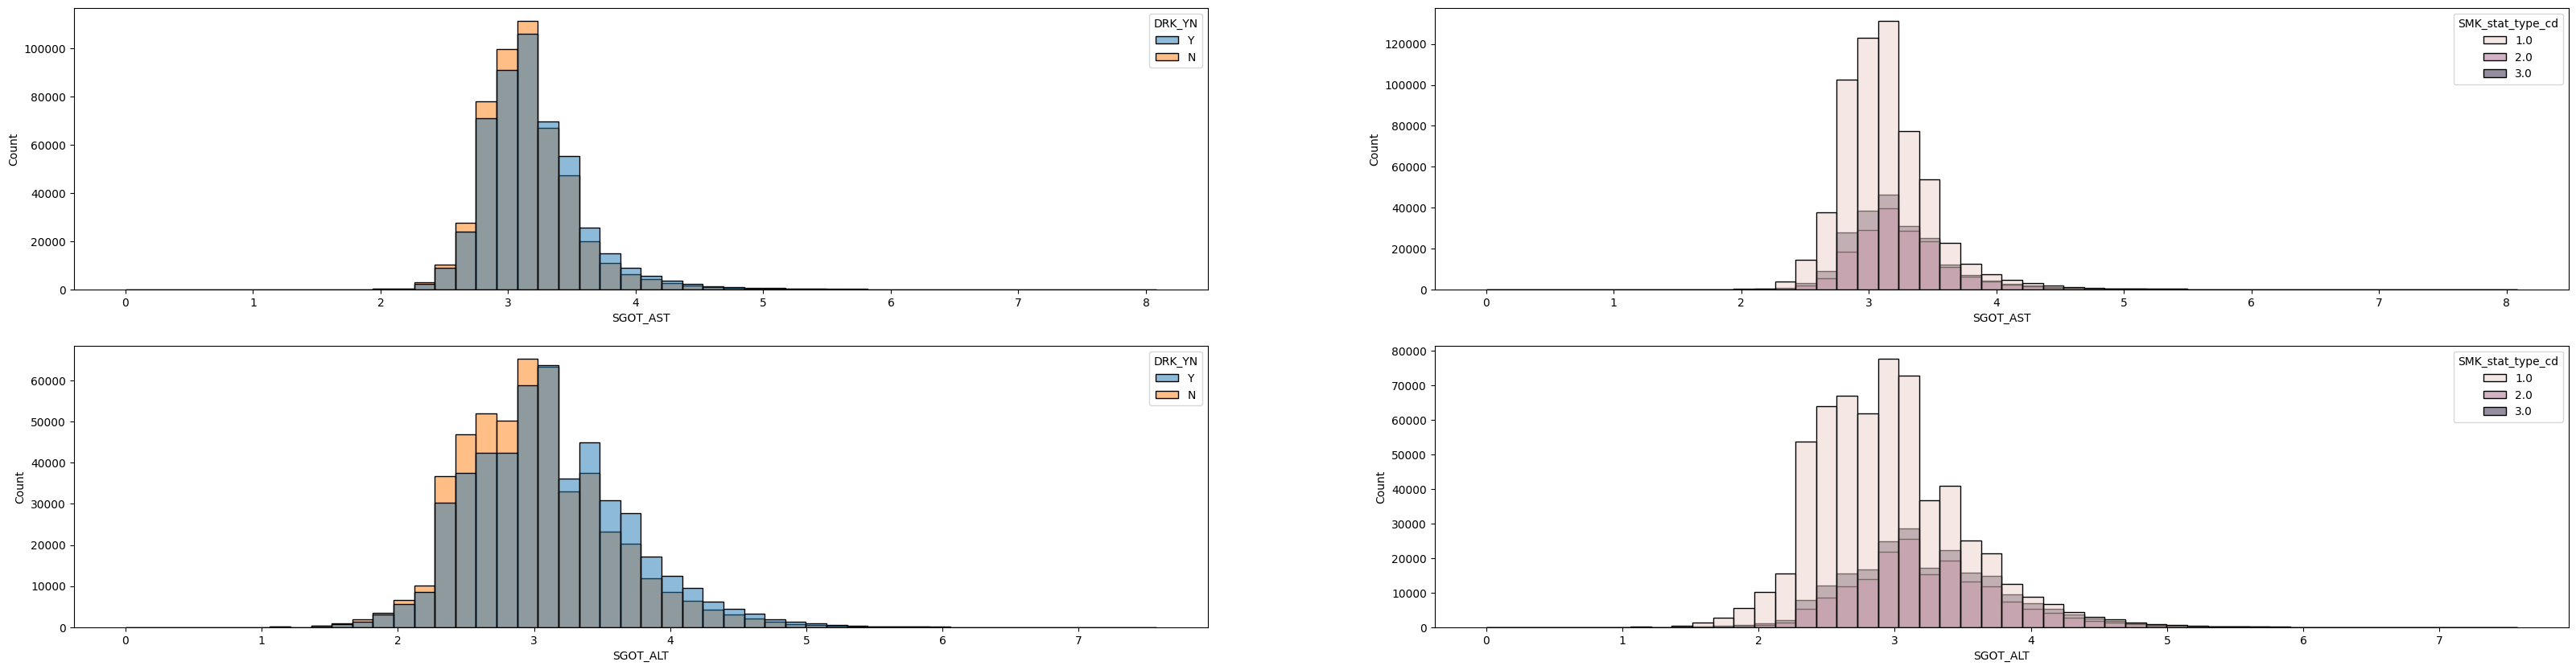

In [ ]:
fig, axs = plt.subplots(2,2,figsize=(40, 10))
sns.histplot(data=data, x="SGOT_AST", bins=50, ax = axs[0][0], hue="DRK_YN")
sns.histplot(data=data, x="SGOT_AST", bins=50, ax=axs[0][1], hue="SMK_stat_type_cd")
sns.histplot(data=data, x="SGOT_ALT", bins=50, ax=axs[1][0], hue="DRK_YN")
sns.histplot(data=data, x="SGOT_ALT", bins=50, ax=axs[1][1], hue="SMK_stat_type_cd")

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"] == "Y", "SGOT_AST"], data.loc[data["DRK_YN"] == "N", "SGOT_AST"]))
print(cohen(data.loc[data["DRK_YN"] == "Y", "SGOT_AST"], data.loc[data["DRK_YN"] == "N", "SGOT_AST"]))

TtestResult(statistic=68.19288336878718, pvalue=0.0, df=985405.0)
0.13739206650808203


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "SGOT_AST"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "SGOT_AST"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=10631.045109725343, pvalue=0.0)
0.021121293769630924


In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"] == "Y", "SGOT_ALT"], data.loc[data["DRK_YN"] == "N", "SGOT_ALT"]))
print(cohen(data.loc[data["DRK_YN"] == "Y", "SGOT_ALT"], data.loc[data["DRK_YN"] == "N", "SGOT_ALT"]))

TtestResult(statistic=97.05642171883484, pvalue=0.0, df=985405.0)
0.1955450728738965


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "SGOT_ALT"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "SGOT_ALT"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=30779.812640864733, pvalue=0.0)
0.058798246467411504


SGOT_AST, dan SGOT_ALT akan digunakan dalam model drink sebagai fitur weak
SGOT_AST, dan SGOT_ALT memiliki pengaruh yang kecil pada smoke

## **gamma_GTP**

Tes untuk mengecek gamma-glutamyl transferase (GGT) dalam darah
GGT banyak ditemukan di dalam hati
jika kandungan GGT dalam darah tingga, maka hati kemungkinan besar mengalami kerusakan

 normal : 0 to 30 IU/L

In [ ]:
data["gamma_GTP"].describe()

count    985407.000000
mean         37.102856
std          50.268522
min           1.000000
25%          16.000000
50%          23.000000
75%          39.000000
max         999.000000
Name: gamma_GTP, dtype: float64

<Axes: xlabel='gamma_GTP'>

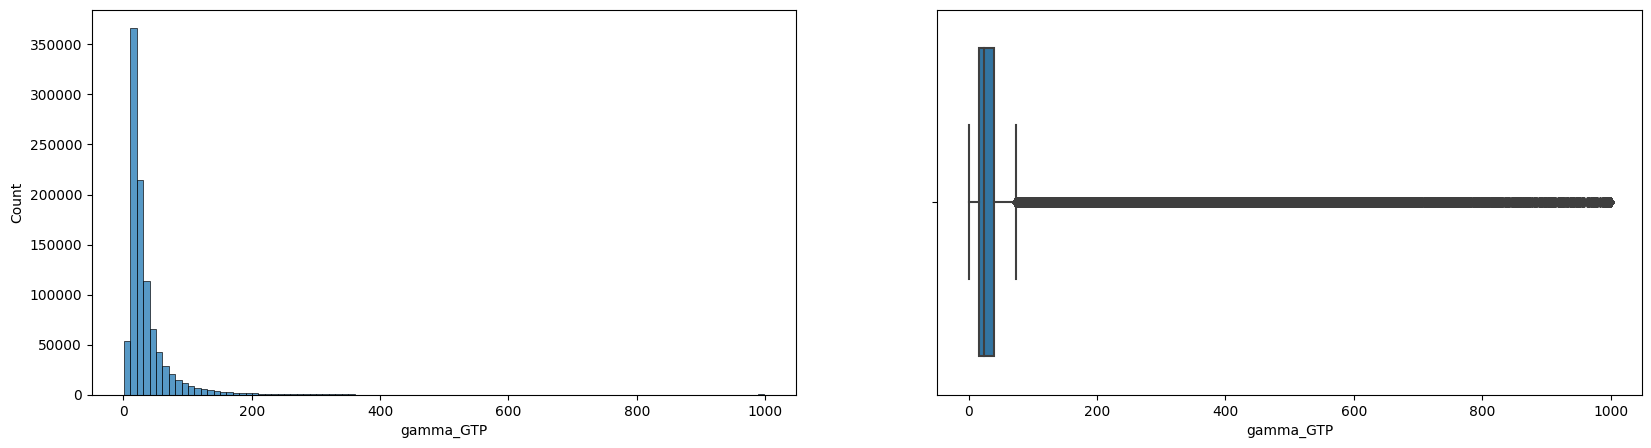

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="gamma_GTP", bins=100, ax=axs[0])
sns.boxplot(data=data, x="gamma_GTP", ax=axs[1])

In [ ]:
data["gamma_GTP"].sort_values(ascending = False)

490717    999.0
166112    999.0
731832    999.0
442825    999.0
310248    999.0
          ...  
80875       1.0
456759      1.0
512691      1.0
333750      1.0
132478      1.0
Name: gamma_GTP, Length: 985407, dtype: float64

In [ ]:
data["gamma_GTP"].value_counts().sort_index(ascending=False)

999.0    231
998.0      1
997.0      1
996.0      2
994.0      2
        ... 
5.0      617
4.0      238
3.0      206
2.0       31
1.0       16
Name: gamma_GTP, Length: 937, dtype: int64

hasil tes GTP dapat mencapai 1000-2000 mg/dL
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8735790/

untuk saat ini, nilai-nilai ekstrem akan kami biarkan

Log transform kolom gamma_GTP

In [31]:
data["gamma_GTP"] = np.log(data["gamma_GTP"])

<Axes: xlabel='gamma_GTP'>

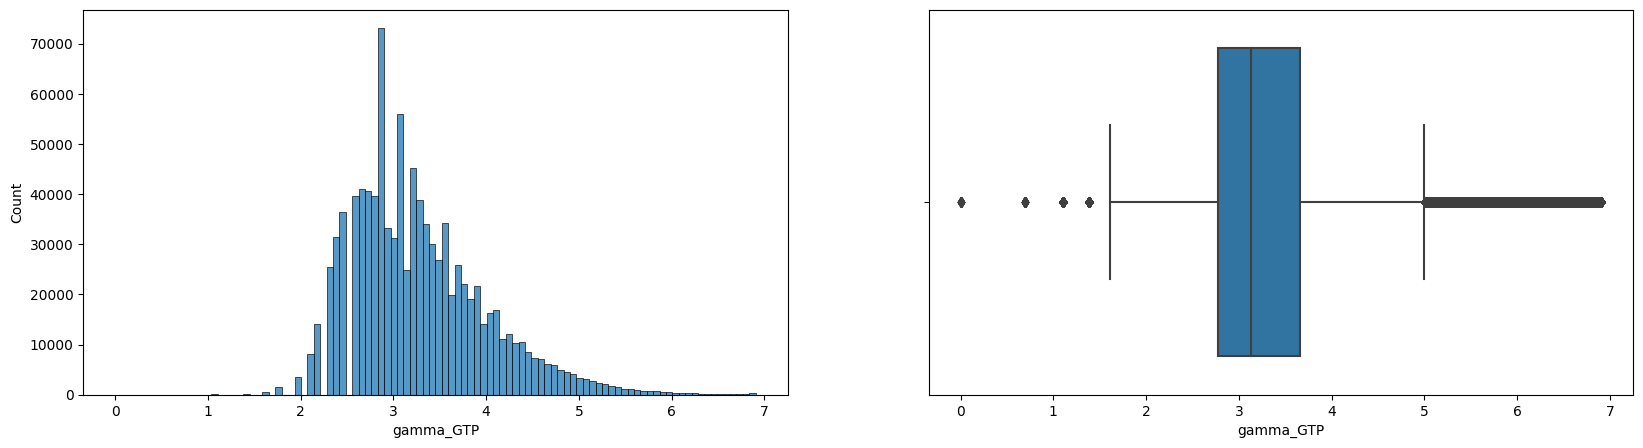

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="gamma_GTP", bins=100, ax=axs[0])
sns.boxplot(data=data, x="gamma_GTP", ax=axs[1])

<Axes: xlabel='gamma_GTP', ylabel='Count'>

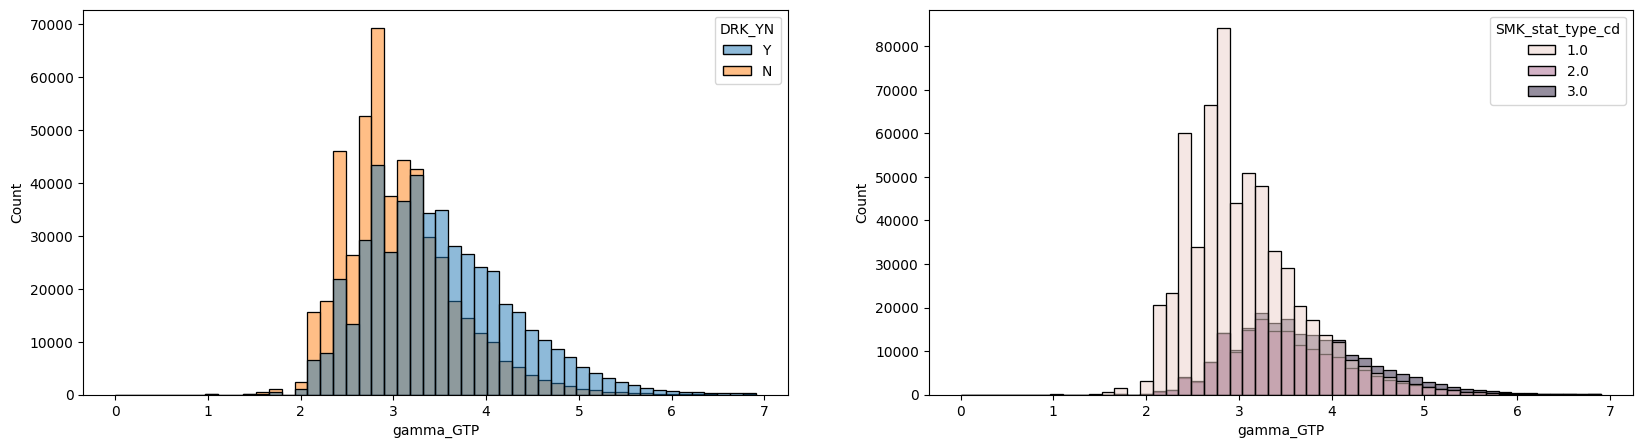

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(20, 5))
sns.histplot(data=data, x="gamma_GTP", bins=50, ax=axs[0], hue="DRK_YN")
sns.histplot(data=data, x="gamma_GTP", bins=50, ax=axs[1], hue="SMK_stat_type_cd")

In [ ]:
print(stats.ttest_ind(data.loc[data["DRK_YN"] == "Y", "gamma_GTP"], data.loc[data["DRK_YN"] == "N", "gamma_GTP"]))
print(cohen(data.loc[data["DRK_YN"] == "Y", "gamma_GTP"], data.loc[data["DRK_YN"] == "N", "gamma_GTP"]))

TtestResult(statistic=311.1070297014303, pvalue=0.0, df=985405.0)
0.6268049626925604


In [ ]:
print(stats.f_oneway(*[data.loc[data["SMK_stat_type_cd"]==i, "gamma_GTP"] for i in data["SMK_stat_type_cd"].unique()]))
print(eta2(*[data.loc[data["SMK_stat_type_cd"]==i, "gamma_GTP"] for i in data["SMK_stat_type_cd"].unique()]))

F_onewayResult(statistic=87941.81452462738, pvalue=0.0)
0.1514556985277206


In [32]:
drink_sig.append("gamma_GTP")
smk_weak.append("gamma_GTP")

gamma_GTP akan digunakan dalam model drink sebagai fitur signifikan karena effect size terhadap drink yang besar dan digunakan dalam model smoke sebagai fitur weak

# **Data Encoding**

Sex dan drink akan diencode dengan label encoding karena hanya memiliki 2 nilai

In [33]:
## data encoding
data_encode={"sex": {"Male":1,"Female" :0},"DRK_YN":{"Y":1,"N":0}}
data = data.replace(data_encode)

# **Train test split**

Kami akan split dataset menjadi 3:<br>
train 70% <br>
validation 20% <br>
test 10%

In [34]:
input_df = data.drop(["DRK_YN", "SMK_stat_type_cd"], axis=1)
output_df_drink = data['DRK_YN']
output_df_smoke = data['SMK_stat_type_cd']

In [35]:
from sklearn.model_selection import train_test_split
x_train_drink, x_val_drink, y_train_drink, y_val_drink = train_test_split(input_df, output_df_drink, test_size = 0.3, random_state = 42)
x_val_drink, x_test_drink, y_val_drink, y_test_drink = train_test_split(x_val_drink, y_val_drink, test_size=1/3, random_state=42)


x_train_smoke, x_val_smoke, y_train_smoke, y_val_smoke = train_test_split(input_df, output_df_smoke, test_size = 0.3, random_state = 42)
x_val_smoke, x_test_smoke, y_val_smoke, y_test_smoke = train_test_split(x_val_smoke, y_val_smoke, test_size=1/3, random_state=42)

# **Normalization**

In [36]:
## normalize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_drink = scaler.fit_transform(x_train_drink)
x_val_drink = scaler.fit_transform(x_val_drink)
x_test_drink = scaler.fit_transform(x_test_drink)

x_train_smoke = scaler.fit_transform(x_train_smoke)
x_val_smoke = scaler.fit_transform(x_val_smoke)
x_test_smoke = scaler.fit_transform(x_test_smoke)





# **Modelling**

Import library and functions needed

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Untuk modelling kami, kami akan membangun model yang terpisah dan independen untuk drink dan smoke dataset

Kami akan mecoba beberapa set fitur dengan random forest tanpa tuning agar tidak memakan waktu yang lama menggunakan :
- dataset dengan semua variabel
- dataset hanya dengan variabel yang signifikan
- dataset dengan variabel signifikan + weak

Setelah memilih set fitur, kami akan melakukan modelling, tuning, dan validasi untuk 2 model:
- Random Forest
- ADA Boosting (decision tree)

Pada saat parameter tuning, agar tidak memakan waktu lama dan tidak memakan RAM, kami akan melakukan tuning sebanyak 2 kali untuk masing-masing model

## **Drink**

### **Random Forest** all features

Kami menggunakan random forest sebagai base line

All features


In [ ]:
RF_class = RandomForestClassifier(criterion= 'entropy', random_state=1)
RF_class.fit(x_train_drink, y_train_drink)

RandomForestClassifier(criterion='entropy', random_state=1)

In [ ]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = RF_class.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    344211
           1       1.00      1.00      1.00    345573

    accuracy                           1.00    689784
   macro avg       1.00      1.00      1.00    689784
weighted avg       1.00      1.00      1.00    689784


Train Data ROC AUC
0.9999898718939269
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     98350
           1       0.72      0.73      0.72     98732

    accuracy                           0.72    197082
   macro avg       0.72      0.72      0.72    197082
weighted avg       0.72      0.72      0.72    197082


Validation Data ROC AUC
0.7213547720016087


Kita dapat melihat bahwa model overfit dengan data train karena metric untuk train yang sangat tinggi dan kemudian turun drastis ketika digunakan untuk melakukan klasifikasi pada data validasi

### **Random Forest** sig features

In [ ]:
x_train_drink_sig = x_train_drink[:, input_df.columns.isin(drink_sig)]
x_val_drink_sig = x_val_drink[:, input_df.columns.isin(drink_sig)]

In [ ]:
RF_class = RandomForestClassifier(criterion="entropy", random_state=1)
RF_class.fit(x_train_drink_sig, y_train_drink)

RandomForestClassifier(criterion='entropy', random_state=1)

In [ ]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_drink_sig)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = RF_class.predict(x_val_drink_sig)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.89      0.90      0.89    344211
           1       0.90      0.89      0.89    345573

    accuracy                           0.89    689784
   macro avg       0.89      0.89      0.89    689784
weighted avg       0.89      0.89      0.89    689784


Train Data ROC AUC
0.8935689946636767
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.66      0.65      0.66     98350
           1       0.66      0.67      0.66     98732

    accuracy                           0.66    197082
   macro avg       0.66      0.66      0.66    197082
weighted avg       0.66      0.66      0.66    197082


Validation Data ROC AUC
0.6613766603233628


Kita masih melihat overfitting pada data train, namun performa model ini dibandingkan dengan model yang mengambil keseluruhan data menurun

### **Random Forest** Sig + weak

In [ ]:
x_train_drink_sigweak = x_train_drink[:, input_df.columns.isin(drink_sig+drink_weak)]
x_val_drink_sigweak = x_val_drink[:, input_df.columns.isin(drink_sig+drink_weak)]

In [ ]:
RF_class = RandomForestClassifier(criterion="entropy", random_state=1)
RF_class.fit(x_train_drink_sigweak, y_train_drink)

RandomForestClassifier(criterion='entropy', random_state=1)

In [ ]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_drink_sigweak)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = RF_class.predict(x_val_drink_sigweak)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    344211
           1       1.00      1.00      1.00    345573

    accuracy                           1.00    689784
   macro avg       1.00      1.00      1.00    689784
weighted avg       1.00      1.00      1.00    689784


Train Data ROC AUC
0.999950714740439
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.71      0.69      0.70     98350
           1       0.70      0.72      0.71     98732

    accuracy                           0.71    197082
   macro avg       0.71      0.71      0.71    197082
weighted avg       0.71      0.71      0.71    197082


Validation Data ROC AUC
0.705633644268707


Model ini juga mengalami overfitting pada. Namun terdapat perbedaan yang kecil pada performa model pada data validasi.

Untuk menghemat waktu dan untuk menjaga performa model, maka kami akan pakai fitur yang tergolong signifikan+weak untuk drink

In [ ]:
x_train_drink = x_train_drink_sigweak
x_val_drink = x_val_drink_sigweak
x_test_drink = x_test_drink[:, input_df.columns.isin(drink_sig+drink_weak)]

### **Random Forest** + Hyperparameter Tuning

Karena model sebelumnya mengalami overfitting, kami akan memberikan early stopping untuk mengurangi overfitting

In [37]:
RF_class = RandomForestClassifier(criterion="entropy", min_samples_split=100, random_state=1)
RF_class.fit(x_train_drink, y_train_drink)

RandomForestClassifier(criterion='entropy', min_samples_split=100,
                       random_state=1)

In [ ]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = RF_class.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.77      0.72      0.74    344211
           1       0.74      0.78      0.76    345573

    accuracy                           0.75    689784
   macro avg       0.75      0.75      0.75    689784
weighted avg       0.75      0.75      0.75    689784


Train Data ROC AUC
0.7528526644569323
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     98350
           1       0.71      0.75      0.73     98732

    accuracy                           0.72    197082
   macro avg       0.72      0.72      0.72    197082
weighted avg       0.72      0.72      0.72    197082


Validation Data ROC AUC
0.718054362771905


Kita dapat melihat bahwa dengan melakukan early stopping, overfitting berkurang drastis dan performa model pada validation data relatif sama

Selanjutnya, kami akan mencoba untuk meningkatkan performa model dengan cara menambahkan jumlah tree

In [38]:
RF_class2 = RandomForestClassifier(criterion="entropy", min_samples_split=100, n_estimators=200, random_state=1)
RF_class2.fit(x_train_drink, y_train_drink)

RandomForestClassifier(criterion='entropy', min_samples_split=100,
                       n_estimators=200, random_state=1)

In [39]:
print("===Train===")
y_predict_train = RF_class2.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = RF_class2.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    344163
           1       0.77      0.80      0.78    345696

    accuracy                           0.78    689859
   macro avg       0.78      0.78      0.78    689859
weighted avg       0.78      0.78      0.78    689859


Train Data ROC AUC
0.7772244945744368
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.71      0.72     98600
           1       0.72      0.74      0.73     98503

    accuracy                           0.73    197103
   macro avg       0.73      0.73      0.73    197103
weighted avg       0.73      0.73      0.73    197103


Validation Data ROC AUC
0.7251531503689336


Kita tidak melihat perbedaan yang besar pada performa model ketika menambahkan jumlah trees

Periksa performa model pada data testing

In [40]:
y_predict_test = RF_class2.predict(x_test_drink)
print('\nTesting Data Classification Report\n')
print(classification_report(y_test_drink, y_predict_test))
print('\nTesting Data ROC AUC')

RF_rocauc_DRINK = roc_auc_score(y_test_drink, y_predict_test)

print(RF_rocauc_DRINK)


Testing Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.70      0.72     49326
           1       0.71      0.75      0.73     49226

    accuracy                           0.72     98552
   macro avg       0.72      0.72      0.72     98552
weighted avg       0.72      0.72      0.72     98552


Testing Data ROC AUC
0.7238839846343845


Kita melihat bahwa performa model pada data testing tidak beda jauh dengan performa model pada data validasi. Hal ini dapat menandakan bahwa model ini robust/berhasil mengeneralisasi untuk data - data yang belum pernah dilihat

### **Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

Ada_boost1 = AdaBoostClassifier(learning_rate = 1, random_state=1)
Ada_boost1.fit(x_train_drink, y_train_drink)

AdaBoostClassifier(learning_rate=1, random_state=1)

In [ ]:
print("===Train===")
y_predict_train = Ada_boost1.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = Ada_boost1.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.70      0.72      0.71    344211
           1       0.71      0.69      0.70    345573

    accuracy                           0.71    689784
   macro avg       0.71      0.71      0.71    689784
weighted avg       0.71      0.71      0.71    689784


Train Data ROC AUC
0.7068781754432809
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.70      0.72      0.71     98350
           1       0.71      0.69      0.70     98732

    accuracy                           0.71    197082
   macro avg       0.71      0.71      0.71    197082
weighted avg       0.71      0.71      0.71    197082


Validation Data ROC AUC
0.7070923454806025


Ada boost tidak mengalami overfitting, namun performa sedikit menurun jika dibandingkan dengan model random forest
Kami akan mencoba untuk meningkatkan n_estimator/jumlah iterasi untuk meningkatkan performa model

In [43]:
Ada_boost2 = AdaBoostClassifier(learning_rate = 1, n_estimators = 200, random_state=1)
Ada_boost2.fit(x_train_drink, y_train_drink)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

In [ ]:
print("===Train===")
y_predict_train = Ada_boost2.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = Ada_boost2.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.71      0.72      0.71    344211
           1       0.71      0.70      0.71    345573

    accuracy                           0.71    689784
   macro avg       0.71      0.71      0.71    689784
weighted avg       0.71      0.71      0.71    689784


Train Data ROC AUC
0.7094023210806812
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.71      0.72      0.71     98350
           1       0.71      0.70      0.71     98732

    accuracy                           0.71    197082
   macro avg       0.71      0.71      0.71    197082
weighted avg       0.71      0.71      0.71    197082


Validation Data ROC AUC
0.7102074257868368


In [ ]:
Ada_boost3 = AdaBoostClassifier(learning_rate = 2, n_estimators = 200, random_state=1)
Ada_boost3.fit(x_train_drink, y_train_drink)

AdaBoostClassifier(learning_rate=2, n_estimators=200, random_state=1)

In [ ]:
print("===Train===")
y_predict_train = Ada_boost3.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = Ada_boost3.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.50      1.00      0.67    344211
           1       0.00      0.00      0.00    345573

    accuracy                           0.50    689784
   macro avg       0.25      0.50      0.33    689784
weighted avg       0.25      0.50      0.33    689784


Train Data ROC AUC
0.5
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.50      1.00      0.67     98350
           1       0.00      0.00      0.00     98732

    accuracy                           0.50    197082
   macro avg       0.25      0.50      0.33    197082
weighted avg       0.25      0.50      0.33    197082


Validation Data ROC AUC
0.5


Ketika learning rate menjadi 2, model hanya memprediksi 1 value. Hal ini terjadi karena learning rate yang terlalu tinggi

In [44]:
y_predict_test = Ada_boost2.predict(x_test_drink)
print('\nTesting Data Classification Report\n')
print(classification_report(y_test_drink, y_predict_test))
print('\nTesting Data ROC AUC')
ADA_rocauc_DRINK = roc_auc_score(y_test_drink, y_predict_test)
print(ADA_rocauc_DRINK)


Testing Data Classification Report

              precision    recall  f1-score   support

           0       0.72      0.72      0.72     49326
           1       0.72      0.71      0.72     49226

    accuracy                           0.72     98552
   macro avg       0.72      0.72      0.72     98552
weighted avg       0.72      0.72      0.72     98552


Testing Data ROC AUC
0.7180403940350145


Kita mendapatkan hasil yang tidak jauh beda dengan model random forest pada data testing

### **Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost = GradientBoostingClassifier(random_state=1)
gradient_boost.fit(x_train_drink, y_train_drink)

GradientBoostingClassifier(random_state=1)

In [ ]:
print("===Train===")
y_predict_train = gradient_boost.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = gradient_boost.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71    344211
           1       0.71      0.75      0.73    345573

    accuracy                           0.72    689784
   macro avg       0.72      0.72      0.72    689784
weighted avg       0.72      0.72      0.72    689784


Train Data ROC AUC
0.7164908559626368
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     98350
           1       0.71      0.75      0.73     98732

    accuracy                           0.72    197082
   macro avg       0.72      0.72      0.72    197082
weighted avg       0.72      0.72      0.72    197082


Validation Data ROC AUC
0.7175542447630978


Model gradient boosting tidak mengalami overfitting
kami akan mencoba untuk meningkatkan n_estimator

In [ ]:
gradient_boost2 = GradientBoostingClassifier(n_estimators=200 ,random_state=1)
gradient_boost2.fit(x_train_drink, y_train_drink)

GradientBoostingClassifier(n_estimators=200, random_state=1)

In [ ]:
print("===Train===")
y_predict_train = gradient_boost2.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = gradient_boost2.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71    344211
           1       0.71      0.75      0.73    345573

    accuracy                           0.72    689784
   macro avg       0.72      0.72      0.72    689784
weighted avg       0.72      0.72      0.72    689784


Train Data ROC AUC
0.7171033924772092
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     98350
           1       0.71      0.75      0.73     98732

    accuracy                           0.72    197082
   macro avg       0.72      0.72      0.72    197082
weighted avg       0.72      0.72      0.72    197082


Validation Data ROC AUC
0.718268594018211


Performa model tidak berubah banyak. Kami akan mencoba untuk meningkatkan learning rate untuk melihat apabila performa model masih bisa meningkat

In [45]:
gradient_boost3 = GradientBoostingClassifier(n_estimators=300, learning_rate = 1.5, random_state=1)
gradient_boost3.fit(x_train_drink, y_train_drink)

GradientBoostingClassifier(learning_rate=1.5, n_estimators=300, random_state=1)

In [ ]:
print("===Train===")
y_predict_train = gradient_boost3.predict(x_train_drink)
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_drink, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_drink, y_predict_train))

print("===Validation===")
y_predict = gradient_boost3.predict(x_val_drink)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_drink, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_drink, y_predict))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71    344211
           1       0.71      0.75      0.73    345573

    accuracy                           0.72    689784
   macro avg       0.72      0.72      0.72    689784
weighted avg       0.72      0.72      0.72    689784


Train Data ROC AUC
0.719694545690316
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     98350
           1       0.70      0.74      0.72     98732

    accuracy                           0.71    197082
   macro avg       0.71      0.71      0.71    197082
weighted avg       0.71      0.71      0.71    197082


Validation Data ROC AUC
0.7139156408702099


Performa model tidak mengalami perkembangan yang signifikan setelah learning rate ditingkatkan

In [46]:
y_predict_test = gradient_boost3.predict(x_test_drink)
print('\nTesting Data Classification Report\n')
print(classification_report(y_test_drink, y_predict_test))
print('\nTesting Data ROC AUC')

GB_rocauc_DRINK = roc_auc_score(y_test_drink, y_predict_test)

print(GB_rocauc_DRINK)


Testing Data Classification Report

              precision    recall  f1-score   support

           0       0.73      0.69      0.71     49326
           1       0.71      0.74      0.72     49226

    accuracy                           0.72     98552
   macro avg       0.72      0.72      0.72     98552
weighted avg       0.72      0.72      0.72     98552


Testing Data ROC AUC
0.7177571491685


Performa model gradient boosting tidak berbeda jauh dengan model - model lain pada data testing

## **Smoke**

Smoke merupakan variabel kategorik dengan 3 outcome, maka prediksi smoke adalah sebuah task multiclass. Model-model yang kami pakai berbasis decision tree, sehingga dapat menangani task multiclass

### **Random Forest** all features

In [38]:
RF_class = RandomForestClassifier(random_state=1)
RF_class.fit(x_train_smoke, y_train_smoke)

RandomForestClassifier(random_state=1)

In [39]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_smoke)
y_predict_train_p = RF_class.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = RF_class.predict(x_val_smoke)
y_predict_p = RF_class.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00    419586
         2.0       1.00      1.00      1.00    121493
         3.0       1.00      1.00      1.00    148745

    accuracy                           1.00    689824
   macro avg       1.00      1.00      1.00    689824
weighted avg       1.00      1.00      1.00    689824


Train Data ROC AUC
0.9999999996927954
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83    119547
         2.0       0.43      0.37      0.40     34874
         3.0       0.50      0.57      0.53     42672

    accuracy                           0.69    197093
   macro avg       0.59      0.59      0.59    197093
weighted avg       0.69      0.69      0.69    197093


Validation Data ROC AUC
0.8372734693431337


Model mengalami overfitting pada data train karena memiliki nilai metric yang secara umum lebih tinggi dibandingkan metric yang didapatkan pada data validasi. Pada data validasi, model dapat memprediksi kelas 1 dengan cukup baik, dilihat dari f1, precision, dan recall yang baik. Namun model kurang bisa memprediksi kelas 2 dan 3 dengan baik.

### **Random Forest** Sig features

In [40]:
x_train_smoke_sig = x_train_smoke[:, input_df.columns.isin(smk_sig)]
x_val_smoke_sig = x_val_smoke[:, input_df.columns.isin(smk_sig)]

In [41]:
RF_class = RandomForestClassifier(random_state=1)
RF_class.fit(x_train_smoke_sig, y_train_smoke)

RandomForestClassifier(random_state=1)

In [42]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_smoke_sig)
y_predict_train_p = RF_class.predict_proba(x_train_smoke_sig) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train, zero_division=0))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = RF_class.predict(x_val_smoke_sig)
y_predict_p = RF_class.predict_proba(x_val_smoke_sig)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict, zero_division=0))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.94      0.73      0.82    419586
         2.0       0.00      0.00      0.00    121493
         3.0       0.38      0.92      0.53    148745

    accuracy                           0.64    689824
   macro avg       0.44      0.55      0.45    689824
weighted avg       0.65      0.64      0.61    689824


Train Data ROC AUC
0.7752777796140823
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.94      0.73      0.82    119547
         2.0       0.00      0.00      0.00     34874
         3.0       0.38      0.92      0.53     42672

    accuracy                           0.64    197093
   macro avg       0.44      0.55      0.45    197093
weighted avg       0.65      0.64      0.61    197093


Validation Data ROC AUC
0.7753005304551864


Model ini tidak mampu memprediksi kelas 2 karena memiliki f1, precision, dan recall 0. Model ini juga kurang baik dalam memprediksi kelas 3.

### **Random Forest** weak + significant feaatures

In [43]:
x_train_smoke_sigweak = x_train_smoke[:, input_df.columns.isin(smk_sig+smk_weak)]
x_val_smoke_sigweak = x_val_smoke[:, input_df.columns.isin(smk_sig+smk_weak)]

In [44]:
RF_class = RandomForestClassifier(random_state=1)
RF_class.fit(x_train_smoke_sigweak, y_train_smoke)

RandomForestClassifier(random_state=1)

In [45]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_smoke_sigweak)
y_predict_train_p = RF_class.predict_proba(x_train_smoke_sigweak) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = RF_class.predict(x_val_smoke_sigweak)
y_predict_p = RF_class.predict_proba(x_val_smoke_sigweak)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.87      0.90      0.89    419586
         2.0       0.66      0.60      0.63    121493
         3.0       0.70      0.68      0.69    148745

    accuracy                           0.80    689824
   macro avg       0.75      0.73      0.74    689824
weighted avg       0.80      0.80      0.80    689824


Train Data ROC AUC
0.9353737992528508
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.78      0.82      0.80    119547
         2.0       0.33      0.29      0.31     34874
         3.0       0.42      0.41      0.42     42672

    accuracy                           0.64    197093
   macro avg       0.51      0.51      0.51    197093
weighted avg       0.63      0.64      0.63    197093


Validation Data ROC AUC
0.774490599021437


Model ini mengalami overfitting, dan juga kurang baik dalam memprediksi kelas 2 dan 3, dilihat dari f1, recall, dan precision untuk kelas tersebut

Kami memutuskan untuk menggunakan semua fitur untuk memprediksi smoke karena performa pada data validasi yang lebih baik

### **Random Forest** + Hyperparameter tuning

Karena model sebelumnya mengalami overfitting, kami akan memberikan early stopping untuk mencoba mencegah overfitting

In [46]:
RF_class = RandomForestClassifier(min_samples_split=100, random_state=1)
RF_class.fit(x_train_smoke, y_train_smoke)

RandomForestClassifier(min_samples_split=100, random_state=1)

In [47]:
print("===Train===")
y_predict_train = RF_class.predict(x_train_smoke)
y_predict_train_p = RF_class.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = RF_class.predict(x_val_smoke)
y_predict_p = RF_class.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.88      0.86      0.87    419586
         2.0       0.59      0.51      0.55    121493
         3.0       0.59      0.69      0.63    148745

    accuracy                           0.76    689824
   macro avg       0.68      0.69      0.68    689824
weighted avg       0.77      0.76      0.76    689824


Train Data ROC AUC
0.8967125459349347
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.85      0.82      0.83    119547
         2.0       0.45      0.39      0.42     34874
         3.0       0.51      0.60      0.55     42672

    accuracy                           0.70    197093
   macro avg       0.60      0.60      0.60    197093
weighted avg       0.70      0.70      0.70    197093


Validation Data ROC AUC
0.8438974630619058


Overfitting pada model berkurang, namun model masih kurang bisa memprediksi kelas 2 dan 3. Kami akan mencoba untuk meningkatkan jumlah tree

In [49]:
RF_class2 = RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)
RF_class2.fit(x_train_smoke, y_train_smoke)

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [50]:
print("===Train===")
y_predict_train = RF_class2.predict(x_train_smoke)
y_predict_train_p = RF_class2.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = RF_class2.predict(x_val_smoke)
y_predict_p = RF_class2.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.88      0.86      0.87    419586
         2.0       0.59      0.52      0.55    121493
         3.0       0.59      0.69      0.63    148745

    accuracy                           0.76    689824
   macro avg       0.69      0.69      0.68    689824
weighted avg       0.77      0.76      0.76    689824


Train Data ROC AUC
0.8972533084122546
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.85      0.82      0.83    119547
         2.0       0.45      0.39      0.42     34874
         3.0       0.51      0.60      0.55     42672

    accuracy                           0.70    197093
   macro avg       0.60      0.61      0.60    197093
weighted avg       0.70      0.70      0.70    197093


Validation Data ROC AUC
0.8442632776741043


Performa model pada kelas 2 dan 3 tidak mengalami peningkatan yang signifikan

In [60]:
y_predict_test = RF_class2.predict(x_test_smoke)
y_predict_test_p = RF_class2.predict_proba(x_test_smoke)
print('\nTesting Data Classification Report\n')
print(classification_report(y_test_smoke, y_predict_test))
print('\nTesting Data ROC AUC')
RF_rocauc_SMOKE = roc_auc_score(y_test_smoke, y_predict_test_p, multi_class="ovr")

print(RF_rocauc_SMOKE)


Testing Data Classification Report

              precision    recall  f1-score   support

         1.0       0.85      0.82      0.83     59899
         2.0       0.44      0.39      0.42     17491
         3.0       0.50      0.60      0.54     21162

    accuracy                           0.69     98552
   macro avg       0.60      0.60      0.60     98552
weighted avg       0.70      0.69      0.70     98552


Testing Data ROC AUC
0.8425602063597308


Performa model pada dataset testing tidak berbeda jauh dengan performa pada dataset validation, model tidak dapat memprediksi dengan baik kelas 2 dan 3

### **Ada Boosting**

In [51]:
Ada_boost1 = AdaBoostClassifier(learning_rate = 1, random_state=1)
Ada_boost1.fit(x_train_smoke, y_train_smoke)

AdaBoostClassifier(learning_rate=1, random_state=1)

In [52]:
print("===Train===")
y_predict_train = Ada_boost1.predict(x_train_smoke)
y_predict_train_p = Ada_boost1.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = Ada_boost1.predict(x_val_smoke)
y_predict_p = Ada_boost1.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.83      0.82      0.83    419586
         2.0       0.43      0.29      0.35    121493
         3.0       0.49      0.63      0.55    148745

    accuracy                           0.69    689824
   macro avg       0.58      0.58      0.58    689824
weighted avg       0.69      0.69      0.68    689824


Train Data ROC AUC
0.8348320195656097
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.83      0.82      0.83    119547
         2.0       0.44      0.30      0.35     34874
         3.0       0.49      0.63      0.55     42672

    accuracy                           0.69    197093
   macro avg       0.59      0.59      0.58    197093
weighted avg       0.69      0.69      0.69    197093


Validation Data ROC AUC
0.8351342039632526


Model ini tidak mengalami overfitting, namun mengalami masalah yang sama dengan model random forest sebelumnya yaitu tidak dapat memprediksi kelas 2 dan 3 dengan baik jika dilihat dari f1, precision, dan recall

Kami akan mencoba untuk memberikan n_estimator yang lebih tinggi

In [53]:
Ada_boost2 = AdaBoostClassifier(learning_rate = 1, n_estimators=200,random_state=1)
Ada_boost2.fit(x_train_smoke, y_train_smoke)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=1)

In [54]:
print("===Train===")
y_predict_train = Ada_boost2.predict(x_train_smoke)
y_predict_train_p = Ada_boost2.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = Ada_boost2.predict(x_val_smoke)
y_predict_p = Ada_boost2.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83    419586
         2.0       0.44      0.31      0.36    121493
         3.0       0.50      0.63      0.56    148745

    accuracy                           0.69    689824
   macro avg       0.59      0.59      0.58    689824
weighted avg       0.69      0.69      0.69    689824


Train Data ROC AUC
0.8377766845018133
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.83      0.83      0.83    119547
         2.0       0.45      0.31      0.37     34874
         3.0       0.50      0.63      0.56     42672

    accuracy                           0.69    197093
   macro avg       0.59      0.59      0.58    197093
weighted avg       0.69      0.69      0.69    197093


Validation Data ROC AUC
0.8378023218689977


Performa model pada kelas 2 dan 3 tidak mengalami peningkatan yang signifikan.
Kami akan mencoba memberikan learning rate yang lebih tinggi

In [55]:
Ada_boost3 = AdaBoostClassifier(learning_rate = 2, n_estimators=200,random_state=1)
Ada_boost3.fit(x_train_smoke, y_train_smoke)

AdaBoostClassifier(learning_rate=2, n_estimators=200, random_state=1)

In [56]:
print("===Train===")
y_predict_train = Ada_boost3.predict(x_train_smoke)
y_predict_train_p = Ada_boost3.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train, zero_division=0))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = Ada_boost3.predict(x_val_smoke)
y_predict_p = Ada_boost3.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict, zero_division=0))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00    419586
         2.0       0.18      1.00      0.30    121493
         3.0       0.00      0.00      0.00    148745

    accuracy                           0.18    689824
   macro avg       0.06      0.33      0.10    689824
weighted avg       0.03      0.18      0.05    689824


Train Data ROC AUC
0.389103870118744
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00    119547
         2.0       0.18      1.00      0.30     34874
         3.0       0.00      0.00      0.00     42672

    accuracy                           0.18    197093
   macro avg       0.06      0.33      0.10    197093
weighted avg       0.03      0.18      0.05    197093


Validation Data ROC AUC
0.38934640948798527


Learning rate terlalu tinggi sehingga model hanya memprediksi satu nilai untk semua data

In [61]:
y_predict_test = Ada_boost2.predict(x_test_smoke)
y_predict_test_p = Ada_boost2.predict_proba(x_test_smoke)
print('\nTesting Data Classification Report\n')
print(classification_report(y_test_smoke, y_predict_test))
print('\nTesting Data ROC AUC')
ADA_rocauc_SMOKE = roc_auc_score(y_test_smoke, y_predict_test_p, multi_class="ovr")



Testing Data Classification Report

              precision    recall  f1-score   support

         1.0       0.84      0.82      0.83     59899
         2.0       0.44      0.31      0.37     17491
         3.0       0.49      0.63      0.55     21162

    accuracy                           0.69     98552
   macro avg       0.59      0.59      0.58     98552
weighted avg       0.69      0.69      0.69     98552


Testing Data ROC AUC


Performa model Ada boosted decision tree pada data testing tidak berbeda jauh dengan performa random forest

### **Gradient Boosting**

In [57]:
g_boost1 = GradientBoostingClassifier(random_state=1)
g_boost1.fit(x_train_smoke, y_train_smoke)

GradientBoostingClassifier(random_state=1)

In [58]:
print("===Train===")
y_predict_train = g_boost1.predict(x_train_smoke)
y_predict_train_p = g_boost1.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = g_boost1.predict(x_val_smoke)
y_predict_p = g_boost1.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.85      0.82      0.83    419586
         2.0       0.44      0.39      0.42    121493
         3.0       0.51      0.60      0.55    148745

    accuracy                           0.70    689824
   macro avg       0.60      0.60      0.60    689824
weighted avg       0.70      0.70      0.70    689824


Train Data ROC AUC
0.8445231512129542
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.84      0.82      0.83    119547
         2.0       0.45      0.40      0.42     34874
         3.0       0.51      0.59      0.55     42672

    accuracy                           0.70    197093
   macro avg       0.60      0.60      0.60    197093
weighted avg       0.70      0.70      0.70    197093


Validation Data ROC AUC
0.8443832438629112


Model ini mengalami masalah yang sama dengan model - model smoking sebelumnya, yaitu tidak dapat memprediksi kelas 2 dan 3

Kami akan mencoba untuk meningkatkan learning rate

In [59]:
g_boost2 = GradientBoostingClassifier(random_state=1, learning_rate = 3)
g_boost2.fit(x_train_smoke, y_train_smoke)

GradientBoostingClassifier(learning_rate=3, random_state=1)

In [60]:
print("===Train===")
y_predict_train = g_boost2.predict(x_train_smoke)
y_predict_train_p = g_boost2.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = g_boost2.predict(x_val_smoke)
y_predict_p = g_boost2.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.94      0.73      0.82    419586
         2.0       0.38      0.39      0.39    121493
         3.0       0.41      0.66      0.50    148745

    accuracy                           0.65    689824
   macro avg       0.58      0.59      0.57    689824
weighted avg       0.73      0.65      0.68    689824


Train Data ROC AUC
0.7178553738180685
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.94      0.73      0.82    119547
         2.0       0.39      0.39      0.39     34874
         3.0       0.41      0.66      0.50     42672

    accuracy                           0.65    197093
   macro avg       0.58      0.59      0.57    197093
weighted avg       0.73      0.65      0.68    197093


Validation Data ROC AUC
0.7183449879152154


Ketika learning rate ditingkatkan, nilai ROC AUC berkurang, sedangkan f1_score tidak berubah bannyak ,namun precision dan recall masing - masing kelas banyak berubah, contohnya precision kelas 1 meningkat, namun recall kelas 1 berkurang jika dibandingkan dengan model sebelumnya

Untuk iterasi selanjutnya, kami akan turunkan learning rate dan meningkatkan n_estimator

In [61]:
g_boost3 = GradientBoostingClassifier(random_state=1, learning_rate = 2, n_estimators=200)
g_boost3.fit(x_train_smoke, y_train_smoke)

GradientBoostingClassifier(learning_rate=2, n_estimators=200, random_state=1)

In [62]:
print("===Train===")
y_predict_train = g_boost3.predict(x_train_smoke)
y_predict_train_p = g_boost3.predict_proba(x_train_smoke) # roc auc hanya dapat digunakan pada binary classification, agar dapat menggunakan OvR, perlu menggunakan probability
print('\nTrain Data Classification Report\n')
print(classification_report(y_train_smoke, y_predict_train))
print('\nTrain Data ROC AUC')
print(roc_auc_score(y_train_smoke, y_predict_train_p, multi_class='ovr'))

print("===Validation===")
y_predict = g_boost3.predict(x_val_smoke)
y_predict_p = g_boost3.predict_proba(x_val_smoke)
print('\nValidation Data Classification Report\n')
print(classification_report(y_val_smoke, y_predict))
print('\nValidation Data ROC AUC')
print(roc_auc_score(y_val_smoke, y_predict_p, multi_class='ovr'))

===Train===

Train Data Classification Report

              precision    recall  f1-score   support

         1.0       0.55      0.76      0.64    419586
         2.0       0.00      0.00      0.00    121493
         3.0       0.05      0.04      0.05    148745

    accuracy                           0.47    689824
   macro avg       0.20      0.27      0.23    689824
weighted avg       0.35      0.47      0.40    689824


Train Data ROC AUC
0.44121928042345776
===Validation===

Validation Data Classification Report

              precision    recall  f1-score   support

         1.0       0.55      0.76      0.64    119547
         2.0       0.00      0.00      0.00     34874
         3.0       0.05      0.04      0.04     42672

    accuracy                           0.47    197093
   macro avg       0.20      0.27      0.23    197093
weighted avg       0.34      0.47      0.40    197093


Validation Data ROC AUC
0.4401759575423821


Kami mendapatkan hasil yang lebih buruk dibandingkan model - model sebelumnya pada data training dan validasi

Kami akan menggunakan model gradient boosting sebelum dilakukan parameter tuning untuk di testing ke dataset test karena memiliki hasil yang paling baik dari ketiga model gradient boosting

In [62]:
y_predict_test = g_boost1.predict(x_test_smoke)
y_predict_test_p = g_boost1.predict_proba(x_test_smoke)
print('\nTesting Data Classification Report\n')
print(classification_report(y_test_smoke, y_predict_test))
print('\nTesting Data ROC AUC')
GB_rocauc_SMOKE = roc_auc_score(y_test_smoke, y_predict_test_p, multi_class="ovr")

print(GB_rocauc_SMOKE)


Testing Data Classification Report

              precision    recall  f1-score   support

         1.0       0.85      0.82      0.83     59899
         2.0       0.44      0.40      0.42     17491
         3.0       0.50      0.60      0.55     21162

    accuracy                           0.70     98552
   macro avg       0.60      0.60      0.60     98552
weighted avg       0.70      0.70      0.70     98552


Testing Data ROC AUC
0.8429646484583735


Hasil dari model gradient boosted decision tree pada data testing tidak berbeda jauh dengan hasil dari model-model dengan algoritma yang berbeda

# **Compare the model**

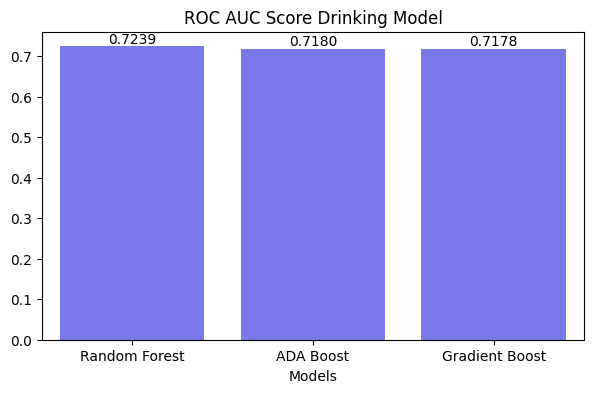

In [71]:
ROCAUC_Score_DRINK = [RF_rocauc_DRINK, ADA_rocauc_DRINK, GB_rocauc_DRINK]
Models = ['Random Forest', 'ADA Boost' , 'Gradient Boost']

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=Models, y=ROCAUC_Score_DRINK, color="b", alpha=0.6)
plt.xlabel('Models')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Models')
plt.title('ROC AUC Score Drinking Model')

plt.show()

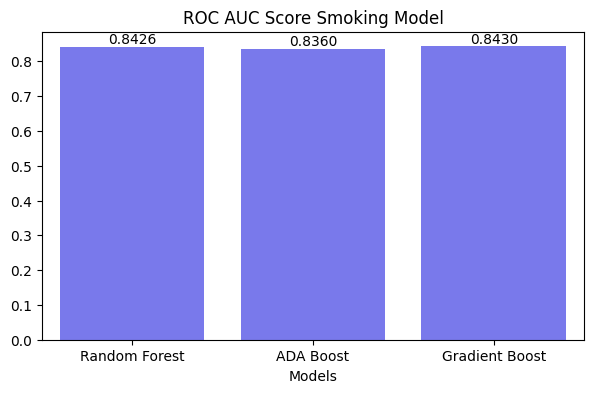

In [70]:
ROCAUC_Score_SMOKE = [RF_rocauc_SMOKE, ADA_rocauc_SMOKE, GB_rocauc_SMOKE]
Models = ['Random Forest', 'ADA Boost' , 'Gradient Boost']

plt.figure(figsize=(7, 4))
ax = sns.barplot(x=Models, y=ROCAUC_Score_SMOKE, color="b", alpha = 0.6)
plt.xlabel('Models')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.xlabel('Models')
plt.title('ROC AUC Score Smoking Model')

plt.show()